# Using Data Of Lahore To Predict Hazard Level by determining AQI

#### Author: Saba Gul

Using Data Of Air Pollutants i-e PM 2.5, PM 10, SO2, NO, NO2 In Lahore To Predict Hazard Level By Predicting the AQI

Note: Since The data is scarce we experience overfitting

Dataset:PakEn.xls, sheet#1

### Importing Python Libraries 

In [233]:
#Import pandas, tensorflow and keras
import pandas as pd
from matplotlib import pyplot
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.data import Dataset
import numpy as np
import keras
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from keras import optimizers

In [137]:
from sklearn.preprocessing import MinMaxScaler
import pandas_profiling

### Reading And Visualizing Data 

In [138]:
#Read the data from excel file
df = pd.read_excel('PakEn.xlsx','Sheet3')

print("Column headings:")
print(df.columns)


Column headings:
Index(['Date Recorded', 'Respirable Pariculate matter (PM10)',
       'Respirable Pariculate matter (PM2.5)', 'Nitrogen Oxides as (NO)',
       'Nitrogen Oxides as (NO2)', 'SulphurDioxide (SO2)', 'AQI'],
      dtype='object')


In [139]:
df.head()

,Date Recorded,Respirable Pariculate matter (PM10),Respirable Pariculate matter (PM2.5),Nitrogen Oxides as (NO),Nitrogen Oxides as (NO2),SulphurDioxide (SO2),AQI
0,2017-11-14,42.0,41.0,18.0,65.0,15.0,2
1,2017-11-15,64.0,63.0,113.0,98.0,25.0,2
2,2017-11-16,42.0,41.0,18.0,65.0,15.0,2
3,2017-11-17,70.0,69.0,193.0,100.0,19.0,3
4,2017-11-18,64.0,63.0,113.0,98.0,25.0,2


### Data Correlation And Trends

In [140]:
pandas_profiling.ProfileReport(df)

Number of variables,7
Number of observations,393
Total Missing (%),0.0%
Total size in memory,21.6 KiB
Average record size in memory,56.2 B
Numeric,6
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [141]:
df.isna().sum()

Date Recorded                           0
Respirable Pariculate matter (PM10)     0
Respirable Pariculate matter (PM2.5)    0
Nitrogen Oxides as (NO)                 0
Nitrogen Oxides as (NO2)                0
SulphurDioxide (SO2)                    0
AQI                                     0
dtype: int64

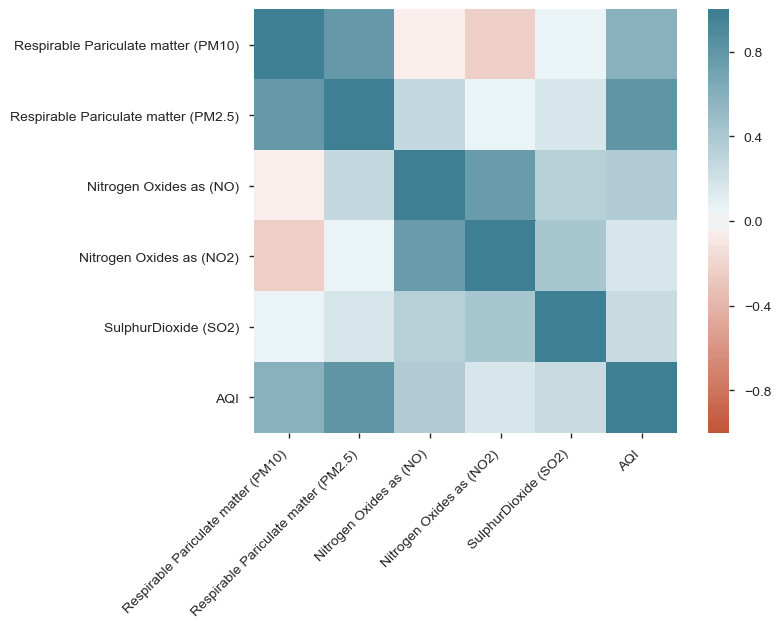

In [142]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

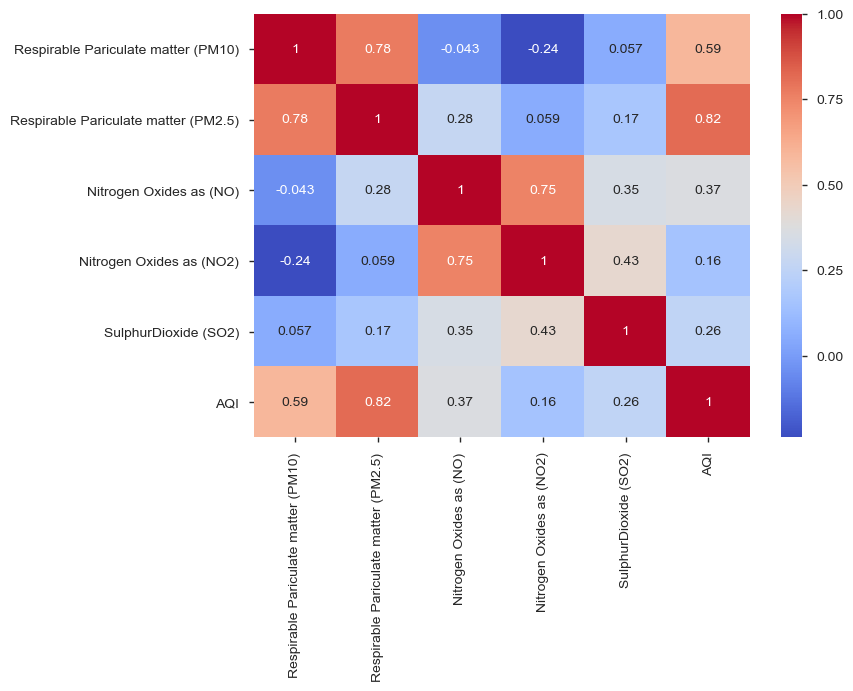

In [143]:
sns.heatmap(corr, annot=True, cmap = "coolwarm")

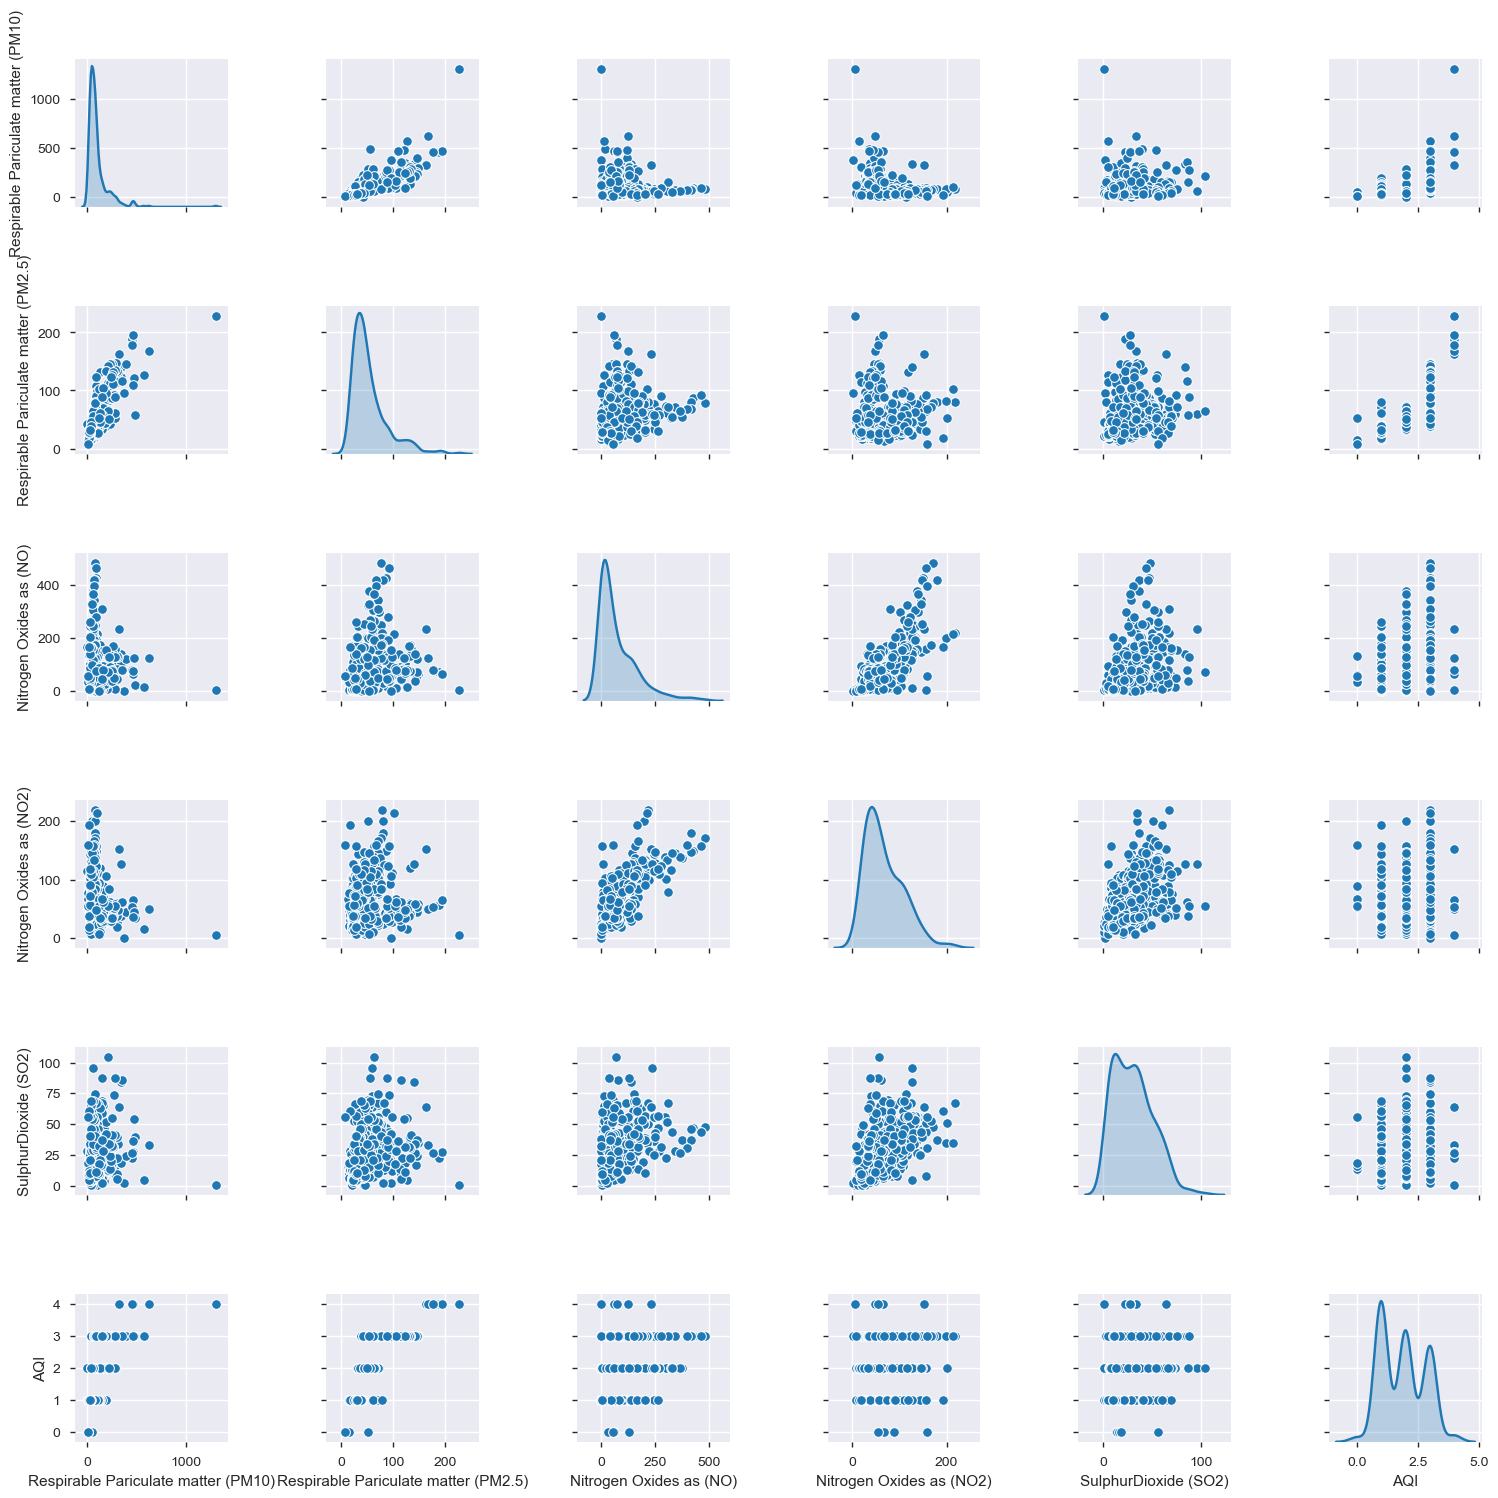

In [144]:
sns.pairplot(df[["Respirable Pariculate matter (PM10)", "Respirable Pariculate matter (PM2.5)", "Nitrogen Oxides as (NO)", "Nitrogen Oxides as (NO2)","SulphurDioxide (SO2)","AQI"]], diag_kind="kde")

C:\Users\HP PC\Anaconda3\envs\Saturn\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP PC\Anaconda3\envs\Saturn\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


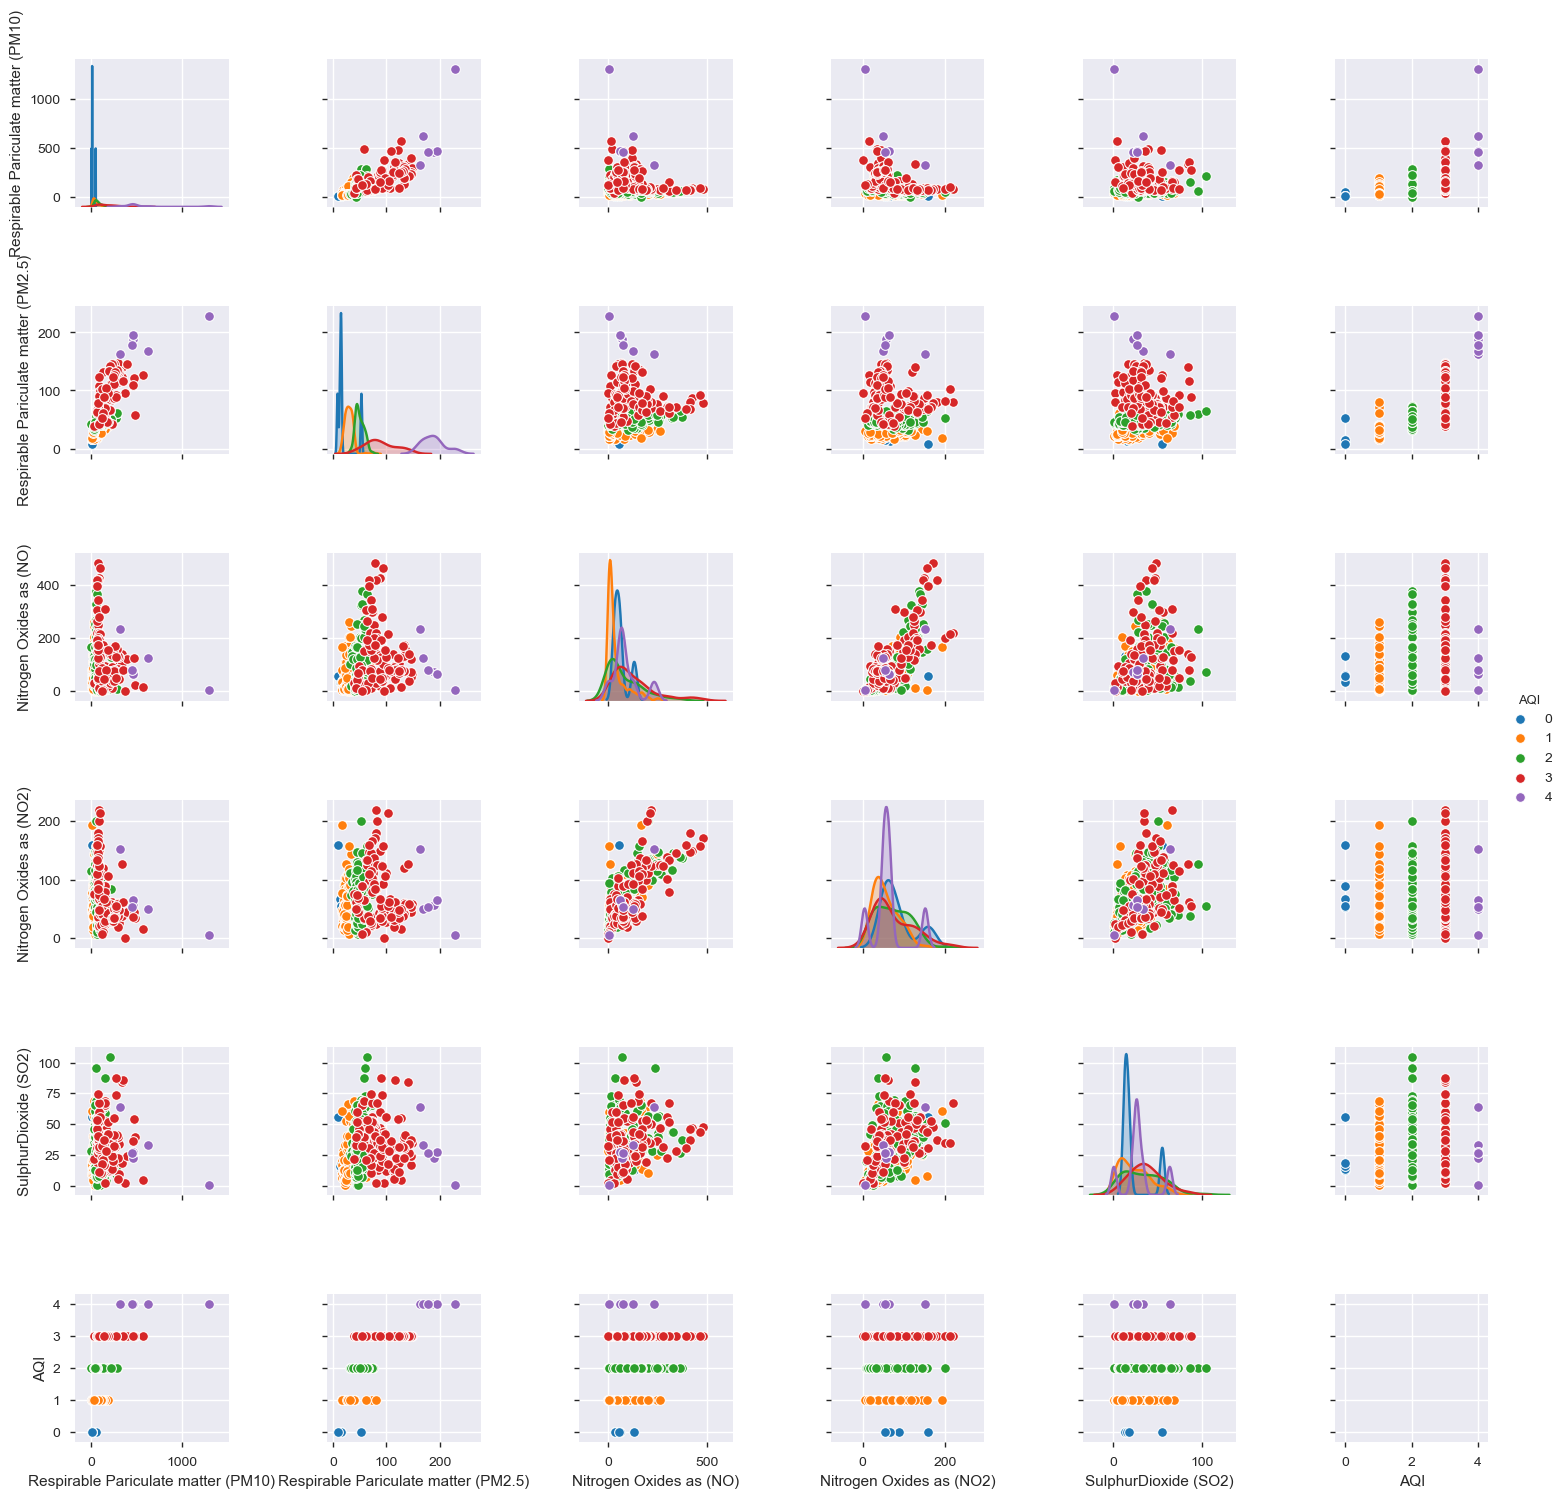

In [145]:
sns.pairplot(df[["Respirable Pariculate matter (PM10)", "Respirable Pariculate matter (PM2.5)", "Nitrogen Oxides as (NO)", "Nitrogen Oxides as (NO2)","SulphurDioxide (SO2)","AQI"]], diag_kind="kde",hue='AQI')

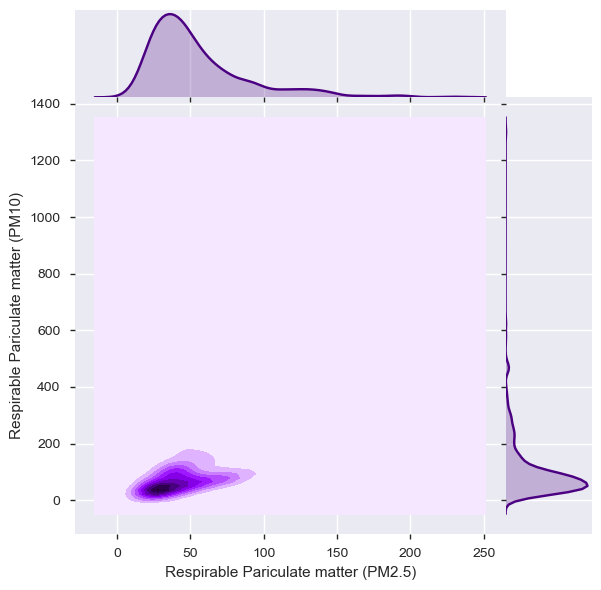

In [146]:
sns.jointplot(x='Respirable Pariculate matter (PM2.5)', y = 'Respirable Pariculate matter (PM10)', data = df, kind="kde", space=0, color="indigo")

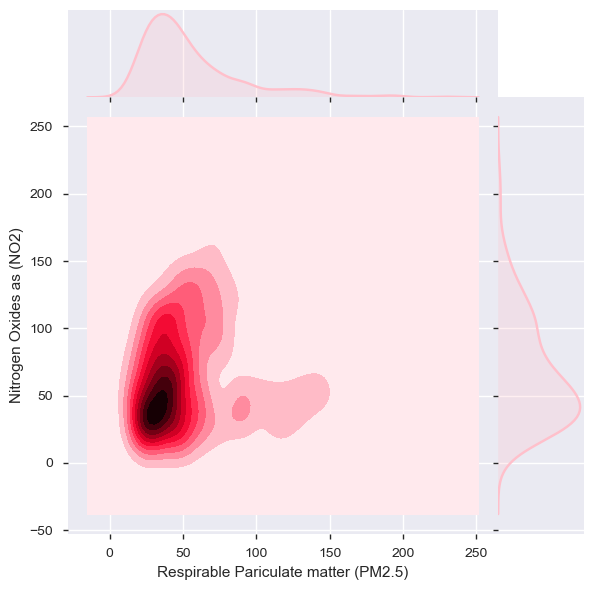

In [147]:
sns.jointplot(x='Respirable Pariculate matter (PM2.5)', y = 'Nitrogen Oxides as (NO2)', data = df, kind="kde", space=0, color="pink")

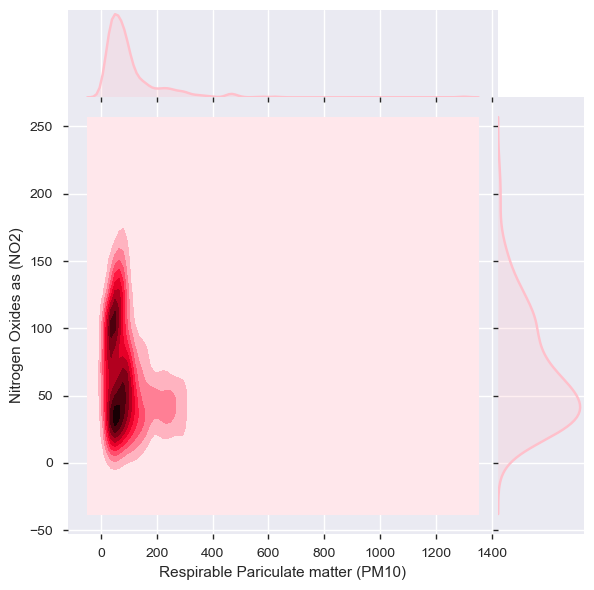

In [148]:
sns.jointplot(x='Respirable Pariculate matter (PM10)', y = 'Nitrogen Oxides as (NO2)', data = df, kind="kde", space=0, color="pink")

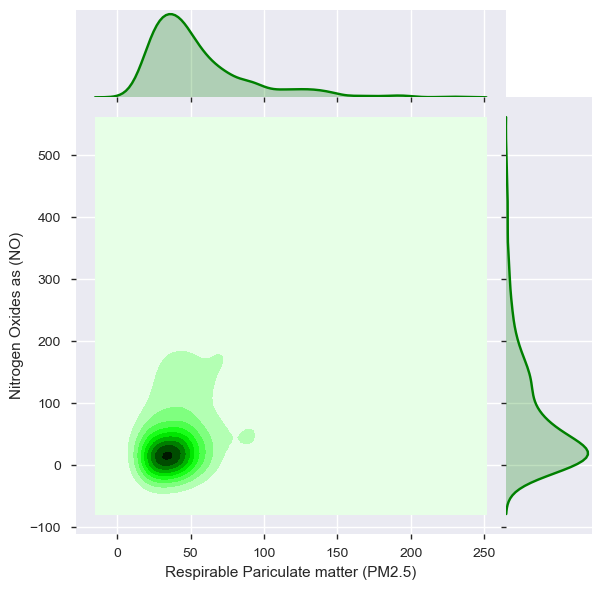

In [149]:
sns.jointplot(x='Respirable Pariculate matter (PM2.5)', y = 'Nitrogen Oxides as (NO)', data = df, kind="kde", space=0, color="green")

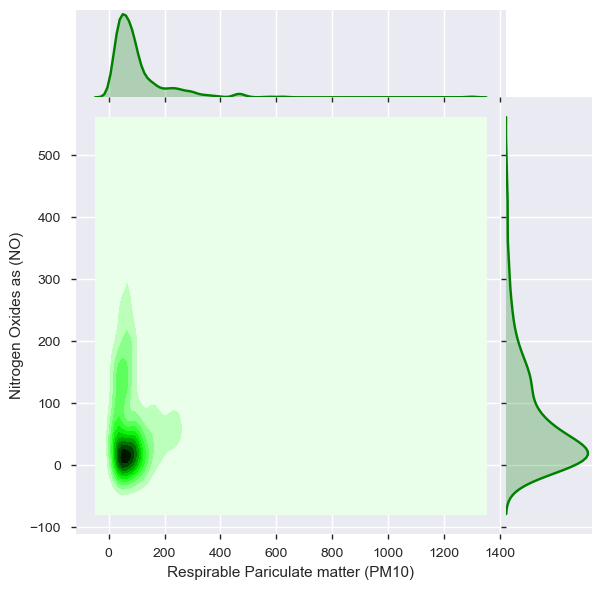

In [150]:
sns.jointplot(x='Respirable Pariculate matter (PM10)', y = 'Nitrogen Oxides as (NO)', data = df, kind="kde", space=0, color="green")

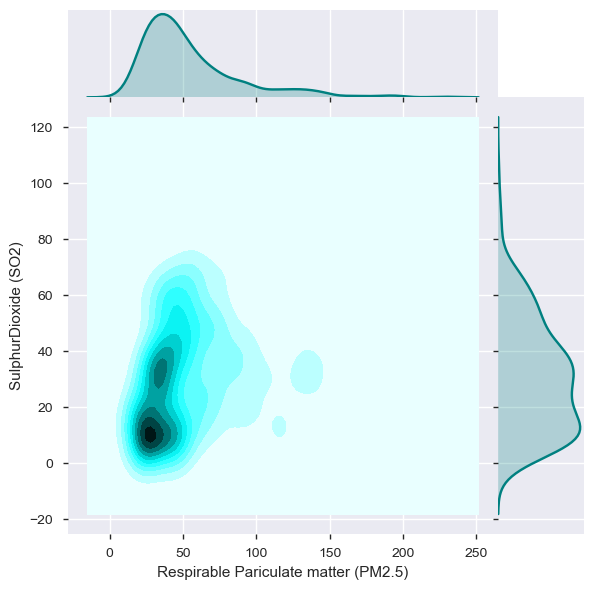

In [151]:
sns.jointplot(x='Respirable Pariculate matter (PM2.5)', y = 'SulphurDioxide (SO2)', data = df, kind="kde", space=0, color="teal")

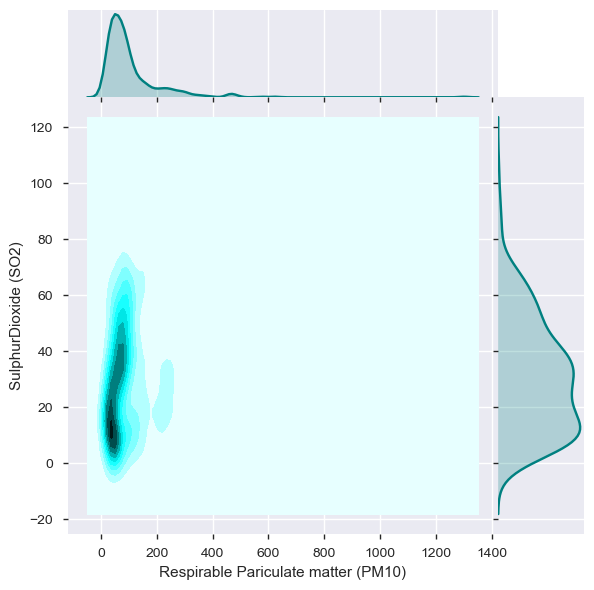

In [152]:
sns.jointplot(x='Respirable Pariculate matter (PM10)', y = 'SulphurDioxide (SO2)', data = df, kind="kde", space=0, color="teal")

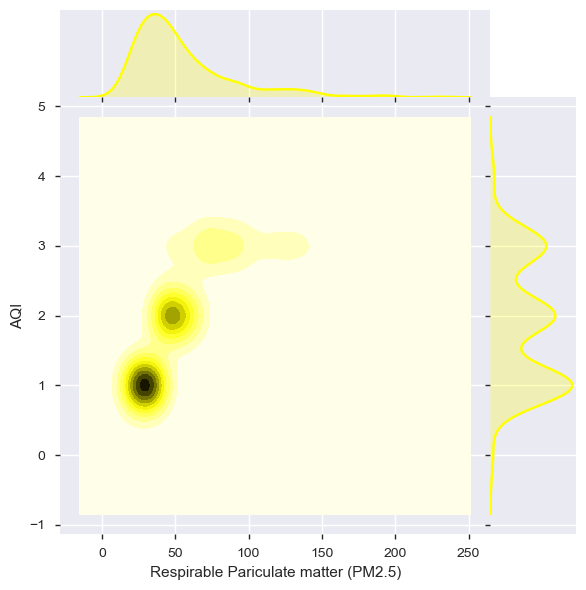

In [153]:
sns.jointplot(x='Respirable Pariculate matter (PM2.5)', y = 'AQI', data = df, kind="kde", space=0, color="yellow")

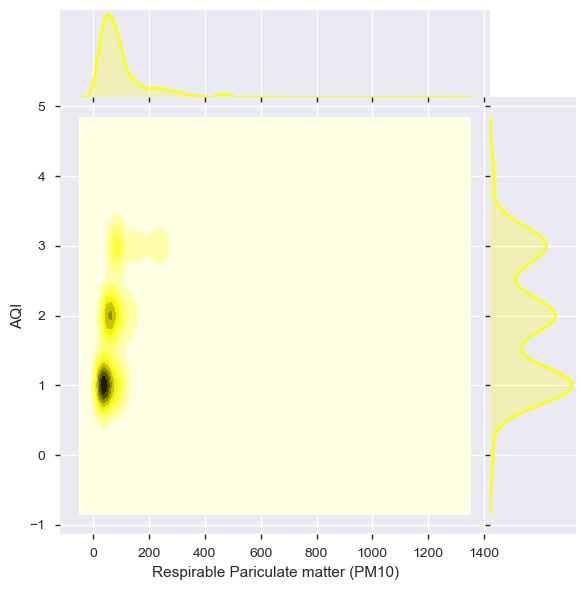

In [154]:
sns.jointplot(x='Respirable Pariculate matter (PM10)', y = 'AQI', data = df, kind="kde", space=0, color="yellow")

### Dataset Split 

In [155]:

#Select predictors
x = df[df.columns[1:6]]
#Target variable 
y = df[df.columns[6]]
#Split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)


### Dataset Description

In [156]:
train_stats = x_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Respirable Pariculate matter (PM10),275.0,100.895189,95.169265,8.573,43.000,71.399,110.0000,624.147
Respirable Pariculate matter (PM2.5),275.0,54.202560,33.747024,8.400,33.000,44.000,63.0765,194.856
Nitrogen Oxides as (NO),275.0,79.686502,89.919263,0.466,11.000,46.290,124.4030,482.000
Nitrogen Oxides as (NO2),275.0,68.519240,39.354212,1.000,35.999,58.000,97.0000,213.000
SulphurDioxide (SO2),275.0,29.894433,18.417677,1.000,13.155,28.000,42.5000,87.526


### Loss And Accuracy Plot Functions

In [157]:
def plot_loss(history, title):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(title)
    plt.xlabel('Nb Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    val_loss = history.history['val_loss']
    min_idx = np.argmin(val_loss)
    min_val_loss = val_loss[min_idx]
    print('Minimum validation loss of {} reached at epoch {}'.format(min_val_loss, min_idx))

In [158]:
def plot_acc(history, title):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['acc'], label='Train')
    plt.plot(history.history['val_acc'], label='Validation')
    plt.title(title)
    plt.xlabel('Nb Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    val_acc = history.history['val_acc']
    max_idx = np.argmax(val_acc)
    max_val_acc = val_acc[max_idx]
    print('Maximum validation Acc of {} reached at epoch {}'.format(max_val_acc*100, max_idx))

### Network Initialization 

In [159]:
'''As y variable is multi class categorical variable, hence using softmax as activation function and sparse-categorical cross entropy as loss function.'''
model = keras.Sequential([
 keras.layers.Dense(124, activation=tf.nn.relu,input_shape=(x_train.shape[1],)),
 keras.layers.Dense(16, activation=tf.nn.relu),
 keras.layers.Dense(5, activation=  'softmax')
 ])



In [160]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 124)               744       
_________________________________________________________________
dense_48 (Dense)             (None, 16)                2000      
_________________________________________________________________
dense_49 (Dense)             (None, 5)                 85        
Total params: 2,829
Trainable params: 2,829
Non-trainable params: 0
_________________________________________________________________


### Network Testing

In [161]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs= 50, batch_size = 10,validation_data = (x_test, y_test))

Train on 275 samples, validate on 118 samples
Epoch 1/50
275/275 [==============================] - 7s 25ms/step - loss: 15.8250 - acc: 0.0182 - val_loss: 15.8449 - val_acc: 0.0169
Epoch 2/50
275/275 [==============================] - 0s 355us/step - loss: 15.8250 - acc: 0.0182 - val_loss: 15.8449 - val_acc: 0.0169
Epoch 3/50
275/275 [==============================] - 0s 1ms/step - loss: 15.8250 - acc: 0.0182 - val_loss: 15.8449 - val_acc: 0.0169
Epoch 4/50
275/275 [==============================] - 0s 290us/step - loss: 15.8250 - acc: 0.0182 - val_loss: 15.8449 - val_acc: 0.0169
Epoch 5/50
275/275 [==============================] - 0s 272us/step - loss: 15.8250 - acc: 0.0182 - val_loss: 15.8449 - val_acc: 0.0169
Epoch 6/50
275/275 [==============================] - 0s 268us/step - loss: 15.8250 - acc: 0.0182 - val_loss: 15.8449 - val_acc: 0.0169
Epoch 7/50
275/275 [==============================] - 0s 276us/step - loss: 15.4310 - acc: 0.0255 - val_loss: 7.7987 - val_acc: 0.2627
Epoch 

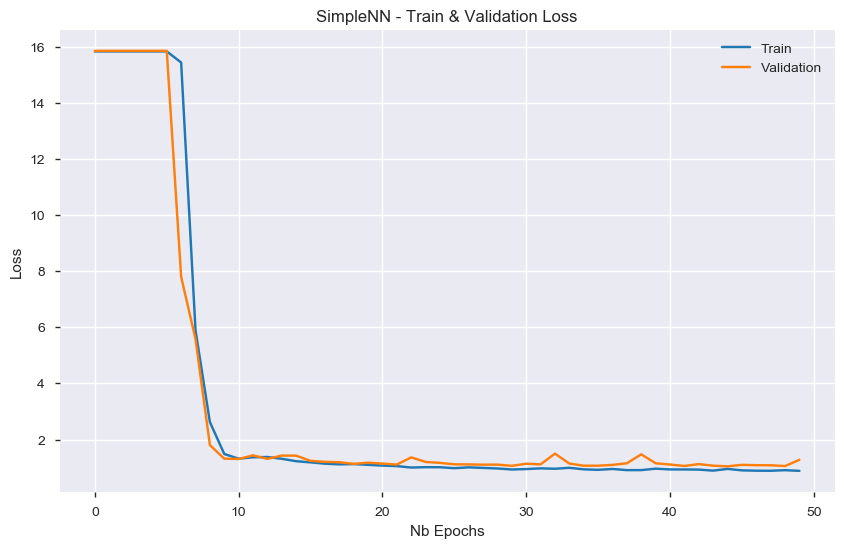

Minimum validation loss of 1.046200127924903 reached at epoch 44


In [162]:
plot_loss(history, 'SimpleNN - Train & Validation Loss')

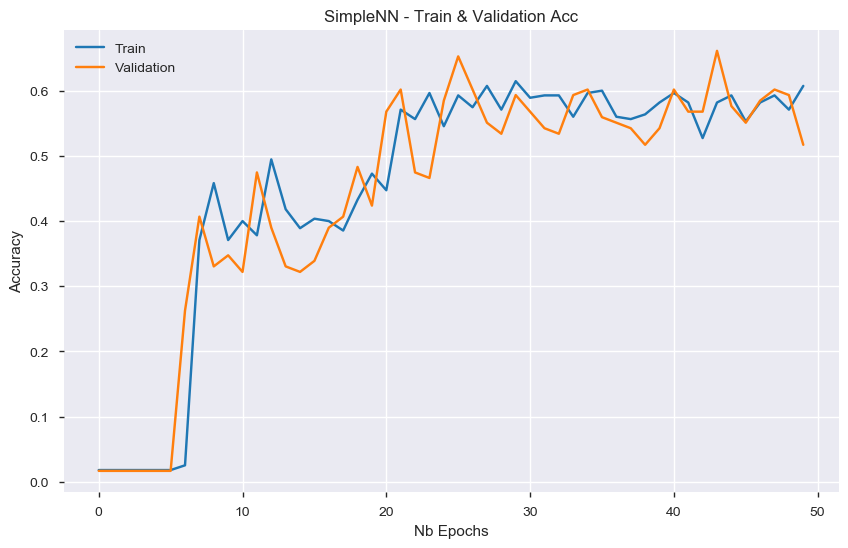

Maximum validation Acc of 66.10169542037835 reached at epoch 43


In [163]:
plot_acc(history, 'SimpleNN - Train & Validation Acc')

In [164]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_acc,loss,acc,epoch
45,1.100427,0.550847,0.904061,0.552727,45
46,1.087689,0.584746,0.892076,0.581818,46
47,1.085615,0.601695,0.889841,0.592727,47
48,1.057827,0.593220,0.909957,0.570909,48
49,1.280711,0.516949,0.886164,0.607273,49


### Network#2 With Normalized Parameters

In [165]:
from sklearn import preprocessing
#Read the data from excel file
df2 = pd.read_excel('PakEn.xlsx', 'Sheet3')
#Select predictors
x = df2[df2.columns[1:6]]
#Target variable 
y = df2[df2.columns[6]]
#Split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)
df2.head()


,Date Recorded,Respirable Pariculate matter (PM10),Respirable Pariculate matter (PM2.5),Nitrogen Oxides as (NO),Nitrogen Oxides as (NO2),SulphurDioxide (SO2),AQI
0,2017-11-14,42.0,41.0,18.0,65.0,15.0,2
1,2017-11-15,64.0,63.0,113.0,98.0,25.0,2
2,2017-11-16,42.0,41.0,18.0,65.0,15.0,2
3,2017-11-17,70.0,69.0,193.0,100.0,19.0,3
4,2017-11-18,64.0,63.0,113.0,98.0,25.0,2


In [166]:
#Select numerical columns which needs to be normalized
train_norm = x_train[x_train.columns[0:6]]
test_norm = x_test[x_test.columns[0:6]]

In [167]:
# Normalize Training Data 
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)


In [168]:
#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
x_train.update(training_norm_col)
print (x_train.head())


C:\Users\HP PC\Anaconda3\envs\Saturn\lib\site-packages\pandas\core\frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


     Respirable Pariculate matter (PM10)  \
221                             0.190585   
65                             -0.483127   
287                            -0.135744   
325                            -0.453273   
51                             -0.556814   

     Respirable Pariculate matter (PM2.5)  Nitrogen Oxides as (NO)  \
221                             -0.510680                -0.832109   
65                              -0.006013                 0.471430   
287                             -0.391935                -0.798685   
325                             -0.788098                -0.688007   
51                              -0.213817                -0.531293   

     Nitrogen Oxides as (NO2)  SulphurDioxide (SO2)  
221                 -1.056937             -1.299729  
65                   0.852305              0.767267  
287                 -0.089588             -1.027756  
325                 -0.833760             -0.601900  
51                   0.241348             -0

In [169]:
# Normalize Testing Data by using mean and SD of training set
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) 
x_test.update(testing_norm_col)
print (x_train.head())

     Respirable Pariculate matter (PM10)  \
221                             0.190585   
65                             -0.483127   
287                            -0.135744   
325                            -0.453273   
51                             -0.556814   

     Respirable Pariculate matter (PM2.5)  Nitrogen Oxides as (NO)  \
221                             -0.510680                -0.832109   
65                              -0.006013                 0.471430   
287                             -0.391935                -0.798685   
325                             -0.788098                -0.688007   
51                              -0.213817                -0.531293   

     Nitrogen Oxides as (NO2)  SulphurDioxide (SO2)  
221                 -1.056937             -1.299729  
65                   0.852305              0.767267  
287                 -0.089588             -1.027756  
325                 -0.833760             -0.601900  
51                   0.241348             -0

C:\Users\HP PC\Anaconda3\envs\Saturn\lib\site-packages\pandas\core\frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


In [170]:
#Build neural network model with normalized data
model = keras.Sequential([
 keras.layers.Dense(64, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(8, activation=tf.nn.relu),
 keras.layers.Dense(5, activation=  'softmax')
 ])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(
 x_train, y_train,
 epochs= 13, batch_size = 8,
 validation_data = (x_test, y_test))


Train on 275 samples, validate on 118 samples
Epoch 1/13
275/275 [==============================] - 1s 4ms/step - loss: 1.5137 - acc: 0.3382 - val_loss: 1.4159 - val_acc: 0.5339
Epoch 2/13
275/275 [==============================] - 0s 355us/step - loss: 1.3898 - acc: 0.5673 - val_loss: 1.3232 - val_acc: 0.5847
Epoch 3/13
275/275 [==============================] - 0s 341us/step - loss: 1.3054 - acc: 0.5782 - val_loss: 1.2068 - val_acc: 0.5169
Epoch 4/13
275/275 [==============================] - 0s 341us/step - loss: 1.1651 - acc: 0.4945 - val_loss: 1.0642 - val_acc: 0.5169
Epoch 5/13
275/275 [==============================] - 0s 326us/step - loss: 1.0273 - acc: 0.5964 - val_loss: 0.9372 - val_acc: 0.7542
Epoch 6/13
275/275 [==============================] - 0s 326us/step - loss: 0.9068 - acc: 0.7127 - val_loss: 0.8233 - val_acc: 0.7627
Epoch 7/13
275/275 [==============================] - 0s 323us/step - loss: 0.8117 - acc: 0.7564 - val_loss: 0.7383 - val_acc: 0.8051
Epoch 8/13
275/275

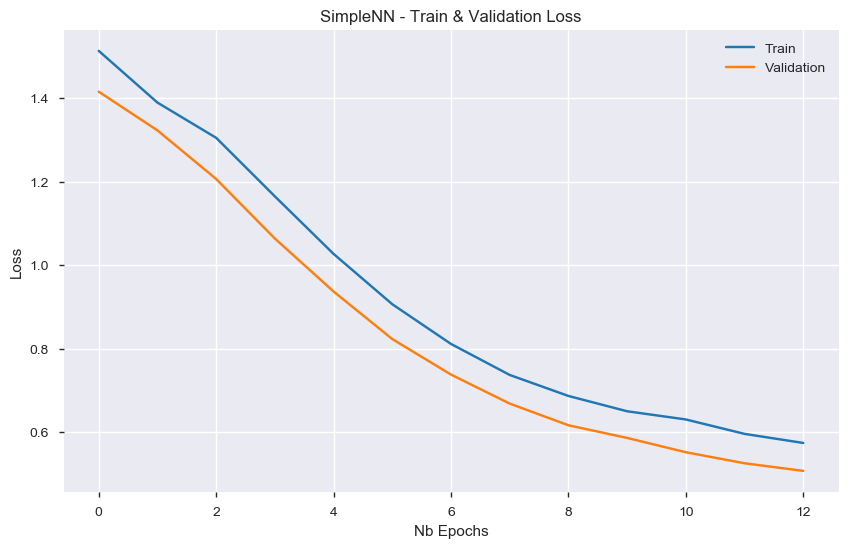

Minimum validation loss of 0.507641828666299 reached at epoch 12


In [171]:
plot_loss(history2, 'SimpleNN - Train & Validation Loss')

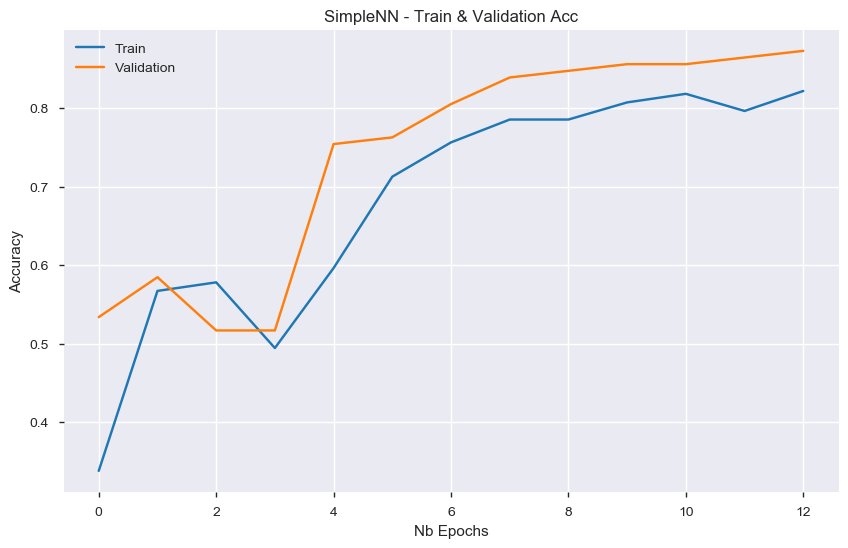

Maximum validation Acc of 87.28813549219552 reached at epoch 12


In [172]:
plot_acc(history2, 'SimpleNN - Train & Validation Acc')

In [173]:
hist = pd.DataFrame(history2.history)
hist['epoch'] = history2.epoch
hist.tail()

,val_loss,val_acc,loss,acc,epoch
8,0.616853,0.847458,0.687078,0.785455,8
9,0.586516,0.855932,0.650387,0.807273,9
10,0.552298,0.855932,0.630754,0.818182,10
11,0.525799,0.864407,0.596211,0.796364,11
12,0.507642,0.872881,0.574475,0.821818,12


### Network#3 With Early Stopping

In [174]:
#Read the data from excel file
df3 = pd.read_excel('PakEn.xlsx','Sheet3')

print("Column headings:")
print(df3.columns)

Column headings:
Index(['Date Recorded', 'Respirable Pariculate matter (PM10)',
       'Respirable Pariculate matter (PM2.5)', 'Nitrogen Oxides as (NO)',
       'Nitrogen Oxides as (NO2)', 'SulphurDioxide (SO2)', 'AQI'],
      dtype='object')


In [175]:
from sklearn import preprocessing
#Read the data from excel file
df3 = pd.read_excel('PakEn.xlsx','Sheet3')
#Select predictors
x = df3[df3.columns[1:6]]
#Target variable 
y = df3[df3.columns[6]]
#Split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)
df2.head()

,Date Recorded,Respirable Pariculate matter (PM10),Respirable Pariculate matter (PM2.5),Nitrogen Oxides as (NO),Nitrogen Oxides as (NO2),SulphurDioxide (SO2),AQI
0,2017-11-14,42.0,41.0,18.0,65.0,15.0,2
1,2017-11-15,64.0,63.0,113.0,98.0,25.0,2
2,2017-11-16,42.0,41.0,18.0,65.0,15.0,2
3,2017-11-17,70.0,69.0,193.0,100.0,19.0,3
4,2017-11-18,64.0,63.0,113.0,98.0,25.0,2


In [176]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_norm = scaler.fit_transform(x_train)
#valid = scaler.transform(valid)
x_test_norm = scaler.transform(x_test)

In [177]:
#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=x_train.index, columns=x_train.columns) 
x_train.update(training_norm_col)
print (x_train.head())

C:\Users\HP PC\Anaconda3\envs\Saturn\lib\site-packages\pandas\core\frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


     Respirable Pariculate matter (PM10)  \
221                             0.179389   
65                              0.075421   
287                             0.129029   
325                             0.080028   
51                              0.064049   

     Respirable Pariculate matter (PM2.5)  Nitrogen Oxides as (NO)  \
221                              0.153387                 0.009416   
65                               0.244562                 0.252389   
287                              0.174840                 0.015646   
325                              0.103268                 0.036276   
51                               0.207019                 0.065487   

     Nitrogen Oxides as (NO2)  SulphurDioxide (SO2)  
221                  0.122642              0.057786  
65                   0.476415              0.496960  
287                  0.301887              0.115572  
325                  0.163995              0.206054  
51                   0.363208              0

In [178]:
x_train.index

Int64Index([221,  65, 287, 325,  51, 388,  25,  41, 195, 257,
            ...
            107,  74, 293,  58, 167, 323, 159, 114, 157, 347],
           dtype='int64', length=275)

In [179]:
#Converting numpy array to dataframe
testing_norm_col = pd.DataFrame(x_test_norm, index=x_test.index, columns=x_test.columns) 
x_test.update(testing_norm_col)
print (x_test.head())

     Respirable Pariculate matter (PM10)  \
327                             0.132944   
79                              0.021812   
39                              0.075421   
239                             0.081919   
344                             0.556987   

     Respirable Pariculate matter (PM2.5)  Nitrogen Oxides as (NO)  \
327                              0.197173                 0.107648   
79                               0.067576                 0.129864   
39                               0.233835                 0.414372   
239                              0.115845                 0.007339   
344                              0.578775                 0.160932   

     Nitrogen Oxides as (NO2)  SulphurDioxide (SO2)  
327                  0.120594              0.226730  
79                   0.419811              0.150244  
39                   0.938679              0.577861  
239                  0.735849              0.080901  
344                  0.284561              0

In [180]:
x_train.to_excel('..train.xlsx')


In [181]:
y_train.to_csv('..ytrain.csv')

C:\Users\HP PC\Anaconda3\envs\Saturn\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [182]:
x_test.to_csv('..test.csv')

In [183]:
y_test.to_csv('..ytest.csv')

C:\Users\HP PC\Anaconda3\envs\Saturn\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [184]:
#Build neural network model with normalized data
model = keras.Sequential([
 keras.layers.Dense(124, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(16, activation=tf.nn.relu),
 keras.layers.Dense(5, activation=  'softmax')
 ])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=3
                             , verbose=0)
history3 = model.fit(
 x_train, y_train,
 epochs= 50, batch_size = 10,
 validation_data = (x_test, y_test), callbacks=[earlystopper])


Train on 275 samples, validate on 118 samples
Epoch 1/50
275/275 [==============================] - 1s 4ms/step - loss: 1.4848 - acc: 0.5455 - val_loss: 1.3758 - val_acc: 0.7119
Epoch 2/50
275/275 [==============================] - 0s 308us/step - loss: 1.3277 - acc: 0.6545 - val_loss: 1.2279 - val_acc: 0.6864
Epoch 3/50
275/275 [==============================] - 0s 294us/step - loss: 1.2015 - acc: 0.6145 - val_loss: 1.1097 - val_acc: 0.7034
Epoch 4/50
275/275 [==============================] - 0s 297us/step - loss: 1.1070 - acc: 0.6109 - val_loss: 1.0203 - val_acc: 0.6695
Epoch 5/50
275/275 [==============================] - 0s 319us/step - loss: 1.0297 - acc: 0.6145 - val_loss: 0.9498 - val_acc: 0.7119
Epoch 6/50
275/275 [==============================] - 0s 308us/step - loss: 0.9703 - acc: 0.6800 - val_loss: 0.8983 - val_acc: 0.6780
Epoch 7/50
275/275 [==============================] - 0s 297us/step - loss: 0.9206 - acc: 0.6836 - val_loss: 0.8394 - val_acc: 0.8051
Epoch 8/50
275/275

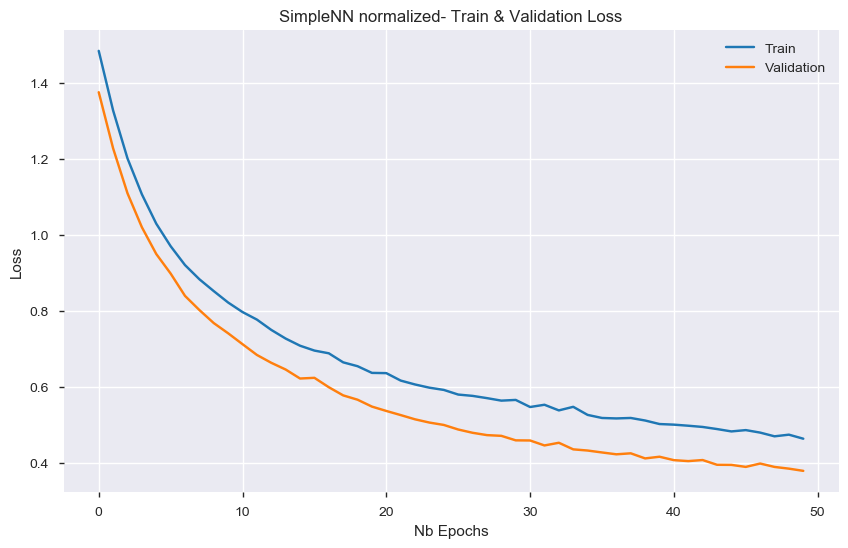

Minimum validation loss of 0.37861857828447376 reached at epoch 49


In [185]:
plot_loss(history3, 'SimpleNN normalized- Train & Validation Loss')

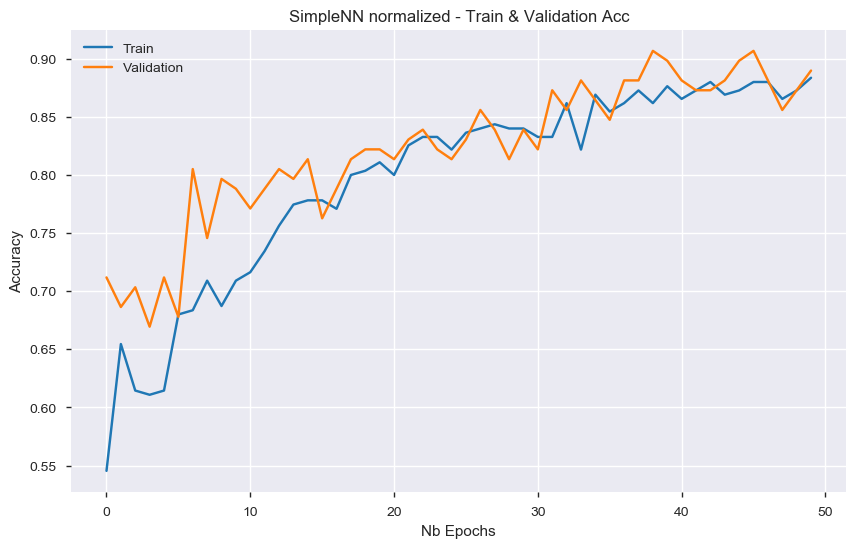

Maximum validation Acc of 90.6779650914467 reached at epoch 38


In [186]:
plot_acc(history3, 'SimpleNN normalized - Train & Validation Acc')

In [187]:
hist = pd.DataFrame(history3.history)
hist['epoch'] = history3.epoch
hist.tail()

,val_loss,val_acc,loss,acc,epoch
45,0.389042,0.906780,0.485961,0.880000,45
46,0.397903,0.881356,0.479387,0.880000,46
47,0.388969,0.855932,0.469585,0.865455,47
48,0.384446,0.872881,0.473938,0.872727,48
49,0.378619,0.889831,0.463302,0.883636,49


In [188]:
x.to_excel('..x.xlsx')

In [189]:
y.to_excel('..y.xlsx')

## Testing With Different Optimizers  https://keras.io/optimizers/

## 1. Optimizer= RMSProp

In [190]:
#Build neural network model with normalized data
model = keras.Sequential([
 keras.layers.Dense(124, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(16, activation=tf.nn.relu),
 keras.layers.Dense(5, activation=  'softmax')
 ])

model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=10
                             , verbose=0)
history4 = model.fit(
 x_train, y_train,
 epochs= 50, batch_size = 10,
 validation_data = (x_test, y_test), callbacks=[earlystopper])

Train on 275 samples, validate on 118 samples
Epoch 1/50
275/275 [==============================] - 1s 4ms/step - loss: 1.5199 - acc: 0.4982 - val_loss: 1.4251 - val_acc: 0.3814
Epoch 2/50
275/275 [==============================] - 0s 412us/step - loss: 1.3797 - acc: 0.6073 - val_loss: 1.2868 - val_acc: 0.7627
Epoch 3/50
275/275 [==============================] - 0s 345us/step - loss: 1.2495 - acc: 0.6800 - val_loss: 1.1774 - val_acc: 0.5678
Epoch 4/50
275/275 [==============================] - 0s 345us/step - loss: 1.1440 - acc: 0.6327 - val_loss: 1.0660 - val_acc: 0.6271
Epoch 5/50
275/275 [==============================] - 0s 334us/step - loss: 1.0648 - acc: 0.6255 - val_loss: 0.9894 - val_acc: 0.6780
Epoch 6/50
275/275 [==============================] - 0s 345us/step - loss: 0.9973 - acc: 0.6473 - val_loss: 0.9149 - val_acc: 0.7881
Epoch 7/50
275/275 [==============================] - 0s 345us/step - loss: 0.9374 - acc: 0.6582 - val_loss: 0.8841 - val_acc: 0.6271
Epoch 8/50
275/275

In [191]:
hist = pd.DataFrame(history4.history)
hist['epoch'] = history4.epoch
hist.tail()

,val_loss,val_acc,loss,acc,epoch
45,0.415034,0.864407,0.506902,0.854545,45
46,0.411847,0.830508,0.501572,0.850909,46
47,0.406318,0.864407,0.506922,0.861818,47
48,0.404799,0.855932,0.497817,0.869091,48
49,0.403124,0.872881,0.496377,0.869091,49


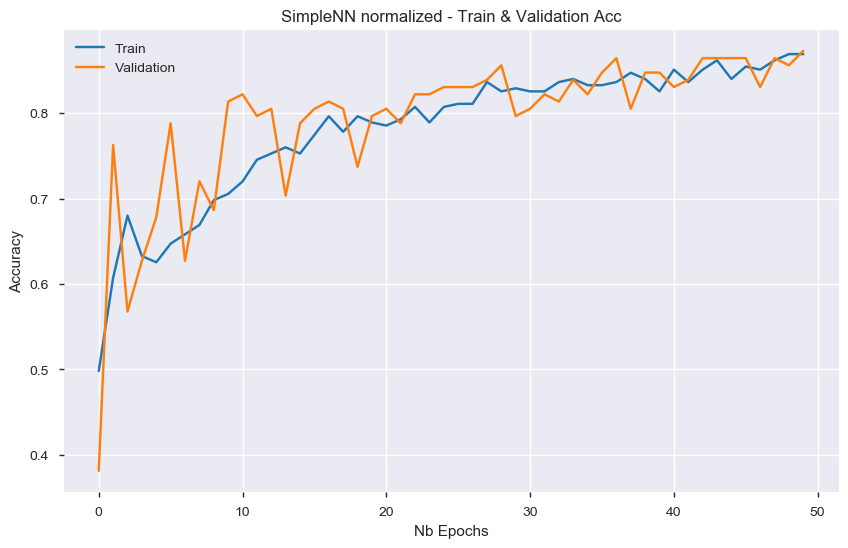

Maximum validation Acc of 87.2881349870714 reached at epoch 49


In [192]:
plot_acc(history4, 'SimpleNN normalized - Train & Validation Acc')

## 2. Optimizer= SGD

In [193]:
#Build neural network model with normalized data
model = keras.Sequential([
 keras.layers.Dense(124, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(16, activation=tf.nn.relu),
 keras.layers.Dense(5, activation=  'softmax')
 ])

model.compile(optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=10
                             , verbose=0)
history5 = model.fit(
 x_train, y_train,
 epochs= 50, batch_size = 10,
 validation_data = (x_test, y_test), callbacks=[earlystopper])

Train on 275 samples, validate on 118 samples
Epoch 1/50
275/275 [==============================] - 1s 4ms/step - loss: 1.5831 - acc: 0.2073 - val_loss: 1.5669 - val_acc: 0.2797
Epoch 2/50
275/275 [==============================] - 0s 319us/step - loss: 1.5756 - acc: 0.2218 - val_loss: 1.5593 - val_acc: 0.2966
Epoch 3/50
275/275 [==============================] - 0s 312us/step - loss: 1.5677 - acc: 0.2364 - val_loss: 1.5515 - val_acc: 0.2966
Epoch 4/50
275/275 [==============================] - 0s 297us/step - loss: 1.5594 - acc: 0.2545 - val_loss: 1.5437 - val_acc: 0.3220
Epoch 5/50
275/275 [==============================] - 0s 297us/step - loss: 1.5513 - acc: 0.2764 - val_loss: 1.5359 - val_acc: 0.3390
Epoch 6/50
275/275 [==============================] - 0s 308us/step - loss: 1.5433 - acc: 0.3236 - val_loss: 1.5279 - val_acc: 0.3475
Epoch 7/50
275/275 [==============================] - 0s 297us/step - loss: 1.5351 - acc: 0.3527 - val_loss: 1.5197 - val_acc: 0.3559
Epoch 8/50
275/275

In [194]:
hist = pd.DataFrame(history5.history)
hist['epoch'] = history5.epoch
hist.tail()

,val_loss,val_acc,loss,acc,epoch
45,1.298307,0.550847,1.310095,0.534545,45
46,1.294226,0.559322,1.306015,0.538182,46
47,1.290260,0.559322,1.302136,0.545455,47
48,1.286254,0.576271,1.298348,0.549091,48
49,1.282440,0.576271,1.294550,0.549091,49


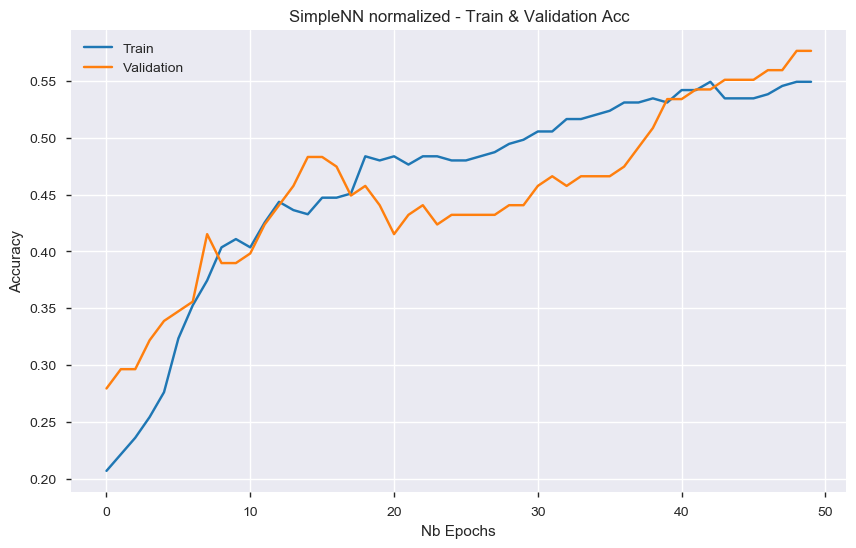

Maximum validation Acc of 57.62711897239847 reached at epoch 48


In [195]:
plot_acc(history5, 'SimpleNN normalized - Train & Validation Acc')

## 3. Optimizer= Adagrad

In [196]:
#Build neural network model with normalized data
model = keras.Sequential([
 keras.layers.Dense(124, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(16, activation=tf.nn.relu),
 keras.layers.Dense(5, activation=  'softmax')
 ])

model.compile(optimizer=keras.optimizers.Adagrad(lr=0.001, epsilon=None, decay=0.0),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=10
                             , verbose=0)
history6 = model.fit(
 x_train, y_train,
 epochs= 50, batch_size = 10,
 validation_data = (x_test, y_test), callbacks=[earlystopper])

Train on 275 samples, validate on 118 samples
Epoch 1/50
275/275 [==============================] - 1s 4ms/step - loss: 1.6036 - acc: 0.4364 - val_loss: 1.5877 - val_acc: 0.4746
Epoch 2/50
275/275 [==============================] - 0s 330us/step - loss: 1.5733 - acc: 0.4764 - val_loss: 1.5628 - val_acc: 0.4661
Epoch 3/50
275/275 [==============================] - 0s 308us/step - loss: 1.5461 - acc: 0.4764 - val_loss: 1.5393 - val_acc: 0.4492
Epoch 4/50
275/275 [==============================] - 0s 319us/step - loss: 1.5250 - acc: 0.4473 - val_loss: 1.5222 - val_acc: 0.4492
Epoch 5/50
275/275 [==============================] - 0s 334us/step - loss: 1.5088 - acc: 0.4364 - val_loss: 1.5079 - val_acc: 0.4068
Epoch 6/50
275/275 [==============================] - 0s 326us/step - loss: 1.4948 - acc: 0.4218 - val_loss: 1.4951 - val_acc: 0.3898
Epoch 7/50
275/275 [==============================] - 0s 323us/step - loss: 1.4824 - acc: 0.4073 - val_loss: 1.4834 - val_acc: 0.3898
Epoch 8/50
275/275

In [197]:
hist = pd.DataFrame(history6.history)
hist['epoch'] = history6.epoch
hist.tail()

,val_loss,val_acc,loss,acc,epoch
45,1.247735,0.449153,1.240268,0.461818,45
46,1.243845,0.449153,1.236489,0.469091,46
47,1.240020,0.449153,1.232771,0.469091,47
48,1.236320,0.457627,1.229141,0.469091,48
49,1.232609,0.457627,1.225609,0.476364,49


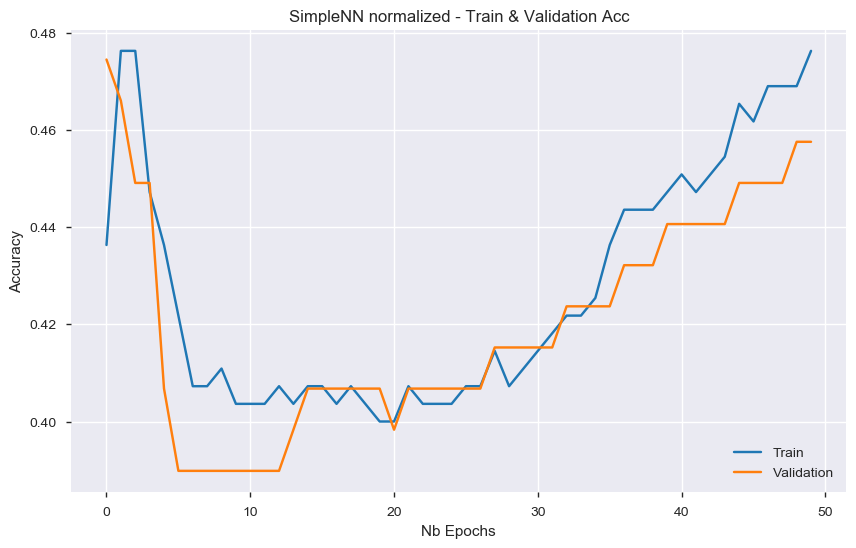

Maximum validation Acc of 47.45762766165249 reached at epoch 0


In [198]:
plot_acc(history6, 'SimpleNN normalized - Train & Validation Acc')

## 4. Optimizer = Adadelta

In [199]:
#Build neural network model with normalized data
model = keras.Sequential([
 keras.layers.Dense(124, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(16, activation=tf.nn.relu),
 keras.layers.Dense(5, activation=  'softmax')
 ])

model.compile(optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=10
                             , verbose=0)
history7 = model.fit(
 x_train, y_train,
 epochs= 50, batch_size = 10,
 validation_data = (x_test, y_test), callbacks=[earlystopper])

Train on 275 samples, validate on 118 samples
Epoch 1/50
275/275 [==============================] - 1s 4ms/step - loss: 1.4962 - acc: 0.3018 - val_loss: 1.3609 - val_acc: 0.5932
Epoch 2/50
275/275 [==============================] - 0s 398us/step - loss: 1.2671 - acc: 0.5782 - val_loss: 1.1523 - val_acc: 0.6017
Epoch 3/50
275/275 [==============================] - 0s 374us/step - loss: 1.1314 - acc: 0.5709 - val_loss: 1.0263 - val_acc: 0.5932
Epoch 4/50
275/275 [==============================] - 0s 370us/step - loss: 1.0090 - acc: 0.6218 - val_loss: 0.9253 - val_acc: 0.7458
Epoch 5/50
275/275 [==============================] - 0s 373us/step - loss: 0.9252 - acc: 0.6218 - val_loss: 0.8327 - val_acc: 0.7797
Epoch 6/50
275/275 [==============================] - 0s 377us/step - loss: 0.8696 - acc: 0.6909 - val_loss: 0.7507 - val_acc: 0.7712
Epoch 7/50
275/275 [==============================] - 0s 370us/step - loss: 0.8119 - acc: 0.6909 - val_loss: 0.7160 - val_acc: 0.7881
Epoch 8/50
275/275

In [200]:
hist = pd.DataFrame(history7.history)
hist['epoch'] = history7.epoch
hist.tail()

,val_loss,val_acc,loss,acc,epoch
45,0.404504,0.889830,0.494753,0.869091,45
46,0.406336,0.872881,0.480162,0.880000,46
47,0.414543,0.838983,0.475619,0.872727,47
48,0.402431,0.881356,0.480799,0.880000,48
49,0.396068,0.872881,0.477187,0.880000,49


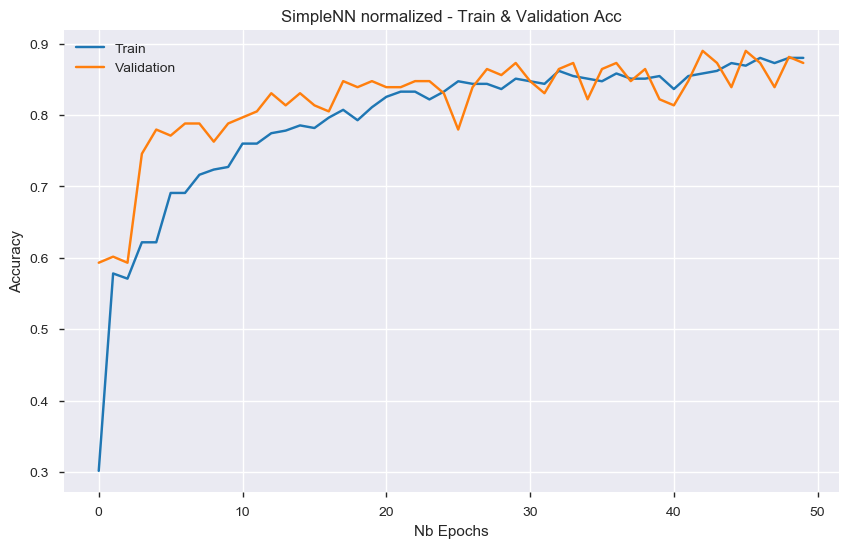

Maximum validation Acc of 88.98304993823423 reached at epoch 42


In [201]:
plot_acc(history7, 'SimpleNN normalized - Train & Validation Acc')

## 5. Optimizer= Adam

In [202]:
#Build neural network model with normalized data
model = keras.Sequential([
 keras.layers.Dense(124, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(16, activation=tf.nn.relu),
 keras.layers.Dense(5, activation=  'softmax')
 ])

model.compile(optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=10
                             , verbose=0)
history8 = model.fit(
 x_train, y_train,
 epochs= 100, batch_size = 10,
 validation_data = (x_test, y_test), callbacks=[earlystopper])

Train on 275 samples, validate on 118 samples
Epoch 1/100
275/275 [==============================] - 1s 4ms/step - loss: 1.4772 - acc: 0.2873 - val_loss: 1.3573 - val_acc: 0.2881
Epoch 2/100
275/275 [==============================] - 0s 385us/step - loss: 1.3022 - acc: 0.3564 - val_loss: 1.2230 - val_acc: 0.3475
Epoch 3/100
275/275 [==============================] - 0s 355us/step - loss: 1.2081 - acc: 0.4109 - val_loss: 1.1522 - val_acc: 0.4068
Epoch 4/100
275/275 [==============================] - 0s 355us/step - loss: 1.1473 - acc: 0.5455 - val_loss: 1.0812 - val_acc: 0.6695
Epoch 5/100
275/275 [==============================] - 0s 348us/step - loss: 1.0831 - acc: 0.6618 - val_loss: 1.0201 - val_acc: 0.6695
Epoch 6/100
275/275 [==============================] - 0s 352us/step - loss: 1.0201 - acc: 0.6182 - val_loss: 0.9512 - val_acc: 0.7542
Epoch 7/100
275/275 [==============================] - 0s 348us/step - loss: 0.9605 - acc: 0.7491 - val_loss: 0.8907 - val_acc: 0.7119
Epoch 8/100

Epoch 61/100
275/275 [==============================] - 0s 348us/step - loss: 0.3942 - acc: 0.8836 - val_loss: 0.3392 - val_acc: 0.8729
Epoch 62/100
275/275 [==============================] - 0s 337us/step - loss: 0.3983 - acc: 0.8873 - val_loss: 0.3505 - val_acc: 0.8644
Epoch 63/100
275/275 [==============================] - 0s 345us/step - loss: 0.3976 - acc: 0.8945 - val_loss: 0.3436 - val_acc: 0.8814
Epoch 64/100
275/275 [==============================] - 0s 341us/step - loss: 0.3960 - acc: 0.8909 - val_loss: 0.3525 - val_acc: 0.8814
Epoch 65/100
275/275 [==============================] - 0s 337us/step - loss: 0.3821 - acc: 0.8982 - val_loss: 0.3392 - val_acc: 0.8814
Epoch 66/100
275/275 [==============================] - 0s 341us/step - loss: 0.3869 - acc: 0.8982 - val_loss: 0.3348 - val_acc: 0.8814
Epoch 67/100
275/275 [==============================] - 0s 337us/step - loss: 0.3781 - acc: 0.8945 - val_loss: 0.3376 - val_acc: 0.8898
Epoch 68/100
275/275 [==========================

In [203]:
hist = pd.DataFrame(history8.history)
hist['epoch'] = history8.epoch
hist.tail()

,val_loss,val_acc,loss,acc,epoch
89,0.333243,0.855932,0.338337,0.898182,89
90,0.323581,0.898305,0.333080,0.901818,90
91,0.326763,0.881356,0.332558,0.898182,91
92,0.323464,0.889831,0.327770,0.909091,92
93,0.331829,0.864407,0.329726,0.905455,93


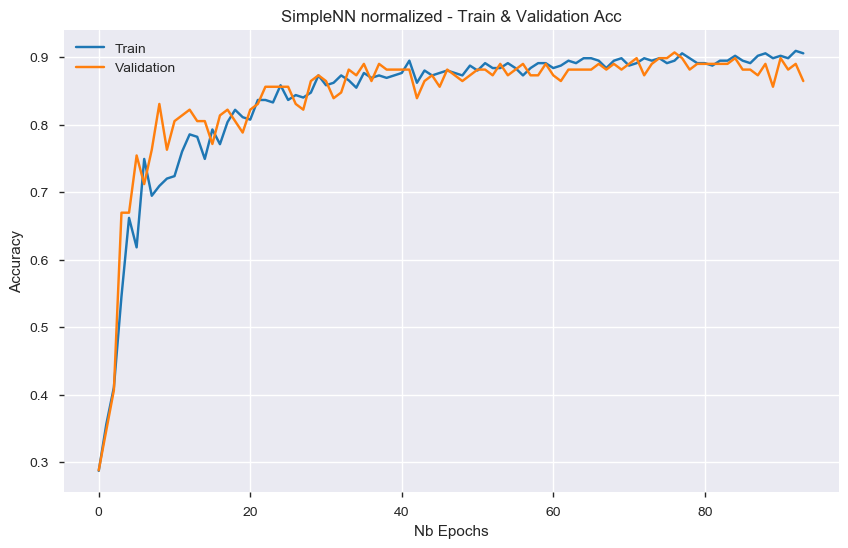

Maximum validation Acc of 90.6779650914467 reached at epoch 76


In [204]:
plot_acc(history8, 'SimpleNN normalized - Train & Validation Acc')

## 6. Optimizer= Adamax

In [205]:
#Build neural network model with normalized data
model = keras.Sequential([
 keras.layers.Dense(124, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(16, activation=tf.nn.relu),
 keras.layers.Dense(5, activation=  'softmax')
 ])

model.compile(optimizer=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=10
                             , verbose=0)
history9 = model.fit(
 x_train, y_train,
 epochs= 50, batch_size = 10,
 validation_data = (x_test, y_test), callbacks=[earlystopper])

Train on 275 samples, validate on 118 samples
Epoch 1/50
275/275 [==============================] - 1s 4ms/step - loss: 1.4881 - acc: 0.3127 - val_loss: 1.3941 - val_acc: 0.2881
Epoch 2/50
275/275 [==============================] - 0s 355us/step - loss: 1.3430 - acc: 0.3491 - val_loss: 1.2700 - val_acc: 0.3305
Epoch 3/50
275/275 [==============================] - 0s 341us/step - loss: 1.2445 - acc: 0.4145 - val_loss: 1.1842 - val_acc: 0.3983
Epoch 4/50
275/275 [==============================] - 0s 363us/step - loss: 1.1776 - acc: 0.5782 - val_loss: 1.1225 - val_acc: 0.6356
Epoch 5/50
275/275 [==============================] - 0s 363us/step - loss: 1.1263 - acc: 0.6691 - val_loss: 1.0761 - val_acc: 0.6864
Epoch 6/50
275/275 [==============================] - 0s 366us/step - loss: 1.0849 - acc: 0.6618 - val_loss: 1.0402 - val_acc: 0.7119
Epoch 7/50
275/275 [==============================] - 0s 366us/step - loss: 1.0537 - acc: 0.6218 - val_loss: 1.0017 - val_acc: 0.6695
Epoch 8/50
275/275

In [206]:
hist = pd.DataFrame(history9.history)
hist['epoch'] = history9.epoch
hist.tail()

,val_loss,val_acc,loss,acc,epoch
45,0.529757,0.813559,0.605534,0.829091,45
46,0.523168,0.838983,0.604282,0.821818,46
47,0.519301,0.847458,0.598955,0.829091,47
48,0.514853,0.855932,0.593712,0.832727,48
49,0.509728,0.838983,0.590404,0.832727,49


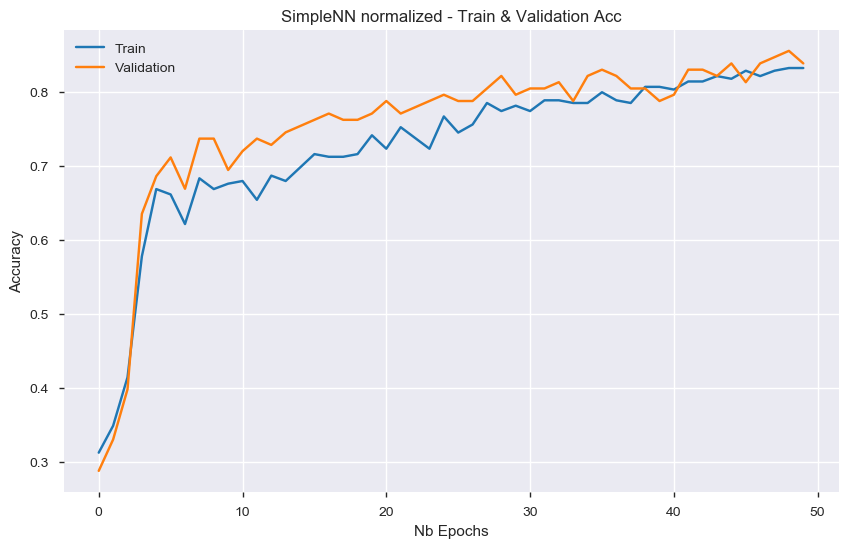

Maximum validation Acc of 85.59322013693341 reached at epoch 48


In [207]:
plot_acc(history9, 'SimpleNN normalized - Train & Validation Acc')

## 7. Optimizer:NADAM

In [208]:
#Build neural network model with normalized data
model = keras.Sequential([
 keras.layers.Dense(124, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(16, activation=tf.nn.relu),
 keras.layers.Dense(5, activation=  'softmax')
 ])

model.compile(optimizer=keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=10
                             , verbose=0)
history10 = model.fit(
 x_train, y_train,
 epochs= 50, batch_size = 10,
 validation_data = (x_test, y_test), callbacks=[earlystopper])

Train on 275 samples, validate on 118 samples
Epoch 1/50
275/275 [==============================] - 1s 5ms/step - loss: 1.5512 - acc: 0.4109 - val_loss: 1.4422 - val_acc: 0.5593
Epoch 2/50
275/275 [==============================] - 0s 421us/step - loss: 1.3091 - acc: 0.5382 - val_loss: 1.1513 - val_acc: 0.5508
Epoch 3/50
275/275 [==============================] - 0s 406us/step - loss: 1.0698 - acc: 0.6291 - val_loss: 0.9573 - val_acc: 0.5847
Epoch 4/50
275/275 [==============================] - 0s 410us/step - loss: 0.9292 - acc: 0.6182 - val_loss: 0.8138 - val_acc: 0.6949
Epoch 5/50
275/275 [==============================] - 0s 403us/step - loss: 0.8503 - acc: 0.6691 - val_loss: 0.7590 - val_acc: 0.7458
Epoch 6/50
275/275 [==============================] - 0s 403us/step - loss: 0.8004 - acc: 0.7018 - val_loss: 0.6984 - val_acc: 0.7542
Epoch 7/50
275/275 [==============================] - 0s 406us/step - loss: 0.7592 - acc: 0.7200 - val_loss: 0.6526 - val_acc: 0.7542
Epoch 8/50
275/275

In [209]:
hist = pd.DataFrame(history10.history)
hist['epoch'] = history10.epoch
hist.tail()

,val_loss,val_acc,loss,acc,epoch
45,0.386255,0.881356,0.460659,0.880000,45
46,0.379403,0.881356,0.460952,0.883636,46
47,0.385203,0.847458,0.452422,0.883636,47
48,0.383342,0.855932,0.453868,0.876364,48
49,0.375942,0.906780,0.452571,0.869091,49


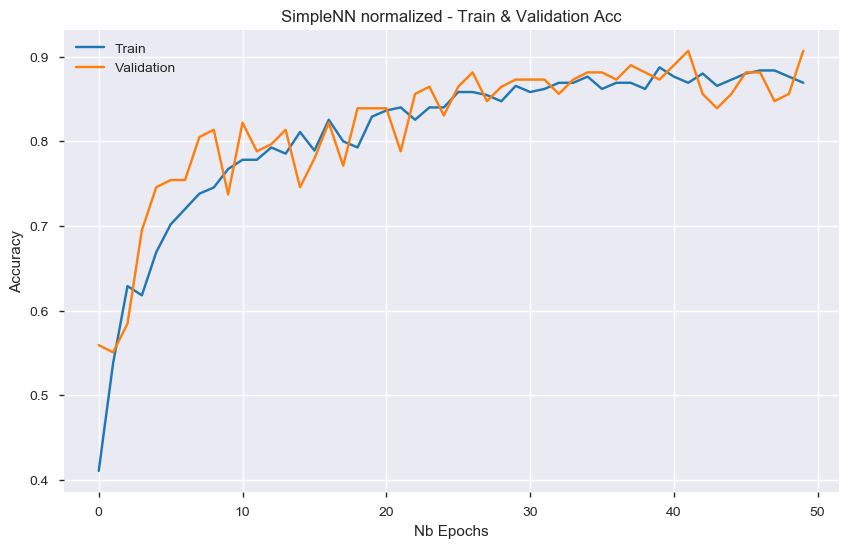

Maximum validation Acc of 90.67796529349634 reached at epoch 41


In [210]:
plot_acc(history10, 'SimpleNN normalized - Train & Validation Acc')

# Introducing LSTM'S

In [280]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import pandas as pd
import time

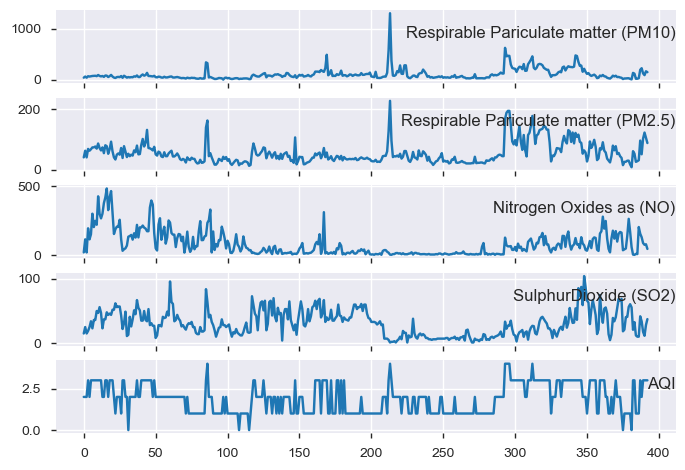

In [281]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset =  pd.read_excel('PakEn.xlsx', 'Sheet3')
values = dataset.values
# specify columns to plot
groups = [1, 2, 3, 5, 6]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [282]:
#Read the data from excel file
df4 = pd.read_excel('PakEn.xlsx', 'Sheet3')
#Select predictors
x = df4[df4.columns[1:6]]
#Target variable 
y = df4[df4.columns[6]]
#Split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)
df4.head()

,Date Recorded,Respirable Pariculate matter (PM10),Respirable Pariculate matter (PM2.5),Nitrogen Oxides as (NO),Nitrogen Oxides as (NO2),SulphurDioxide (SO2),AQI
0,2017-11-14,42.0,41.0,18.0,65.0,15.0,2
1,2017-11-15,64.0,63.0,113.0,98.0,25.0,2
2,2017-11-16,42.0,41.0,18.0,65.0,15.0,2
3,2017-11-17,70.0,69.0,193.0,100.0,19.0,3
4,2017-11-18,64.0,63.0,113.0,98.0,25.0,2


In [283]:
x_train.shape

(275, 5)

In [284]:
#Select numerical columns which needs to be normalized
train_norm = x_train[x_train.columns[0:6]]
test_norm = x_test[x_test.columns[0:6]]

In [285]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_norm = scaler.fit_transform(x_train)
#valid = scaler.transform(valid)
x_test_norm = scaler.transform(x_test)

In [286]:
#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=x_train.index, columns=x_train.columns) 
x_train.update(training_norm_col)
print (x_train.head())

C:\Users\HP PC\Anaconda3\envs\Saturn\lib\site-packages\pandas\core\frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


     Respirable Pariculate matter (PM10)  \
221                             0.179389   
65                              0.075421   
287                             0.129029   
325                             0.080028   
51                              0.064049   

     Respirable Pariculate matter (PM2.5)  Nitrogen Oxides as (NO)  \
221                              0.153387                 0.009416   
65                               0.244562                 0.252389   
287                              0.174840                 0.015646   
325                              0.103268                 0.036276   
51                               0.207019                 0.065487   

     Nitrogen Oxides as (NO2)  SulphurDioxide (SO2)  
221                  0.122642              0.057786  
65                   0.476415              0.496960  
287                  0.301887              0.115572  
325                  0.163995              0.206054  
51                   0.363208              0

In [287]:
#Converting numpy array to dataframe
testing_norm_col = pd.DataFrame(x_test_norm, index=x_test.index, columns=x_test.columns) 
x_test.update(testing_norm_col)
print (x_test.head())

     Respirable Pariculate matter (PM10)  \
327                             0.132944   
79                              0.021812   
39                              0.075421   
239                             0.081919   
344                             0.556987   

     Respirable Pariculate matter (PM2.5)  Nitrogen Oxides as (NO)  \
327                              0.197173                 0.107648   
79                               0.067576                 0.129864   
39                               0.233835                 0.414372   
239                              0.115845                 0.007339   
344                              0.578775                 0.160932   

     Nitrogen Oxides as (NO2)  SulphurDioxide (SO2)  
327                  0.120594              0.226730  
79                   0.419811              0.150244  
39                   0.938679              0.577861  
239                  0.735849              0.080901  
344                  0.284561              0

In [288]:
x_test= np.array(x_test)
y_test= np.array(y_test)
x_train= np.array(x_train)
y_train= np.array(y_train)

In [289]:

# reshape input to be 3D [samples, timesteps, features]
train_X = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
test_X = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(275, 5) (275,) (118, 5) (118,)


In [290]:
# design network
model = Sequential()
model.add(LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], optimizer='adam')
earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=10
                             , verbose=0)

In [291]:

# fit network
history11 = model.fit(train_X, y_train, epochs=50, batch_size=8, validation_data=(test_X, y_test), verbose=2, shuffle=False,callbacks=[earlystopper])

Train on 275 samples, validate on 118 samples
Epoch 1/50
 - 3s - loss: 1.5603 - acc: 0.3745 - val_loss: 1.4812 - val_acc: 0.4068
Epoch 2/50
 - 0s - loss: 1.3974 - acc: 0.4291 - val_loss: 1.2851 - val_acc: 0.5424
Epoch 3/50
 - 0s - loss: 1.2507 - acc: 0.5018 - val_loss: 1.1780 - val_acc: 0.5593
Epoch 4/50
 - 0s - loss: 1.1743 - acc: 0.5527 - val_loss: 1.1023 - val_acc: 0.5932
Epoch 5/50
 - 0s - loss: 1.0997 - acc: 0.6109 - val_loss: 1.0144 - val_acc: 0.6525
Epoch 6/50
 - 0s - loss: 1.0132 - acc: 0.6400 - val_loss: 0.9218 - val_acc: 0.6780
Epoch 7/50
 - 0s - loss: 0.9270 - acc: 0.6727 - val_loss: 0.8375 - val_acc: 0.7119
Epoch 8/50
 - 0s - loss: 0.8550 - acc: 0.6764 - val_loss: 0.7696 - val_acc: 0.7119
Epoch 9/50
 - 0s - loss: 0.8010 - acc: 0.6909 - val_loss: 0.7166 - val_acc: 0.7542
Epoch 10/50
 - 0s - loss: 0.7597 - acc: 0.7127 - val_loss: 0.6750 - val_acc: 0.7712
Epoch 11/50
 - 0s - loss: 0.7277 - acc: 0.7345 - val_loss: 0.6415 - val_acc: 0.7797
Epoch 12/50
 - 0s - loss: 0.7021 - acc:

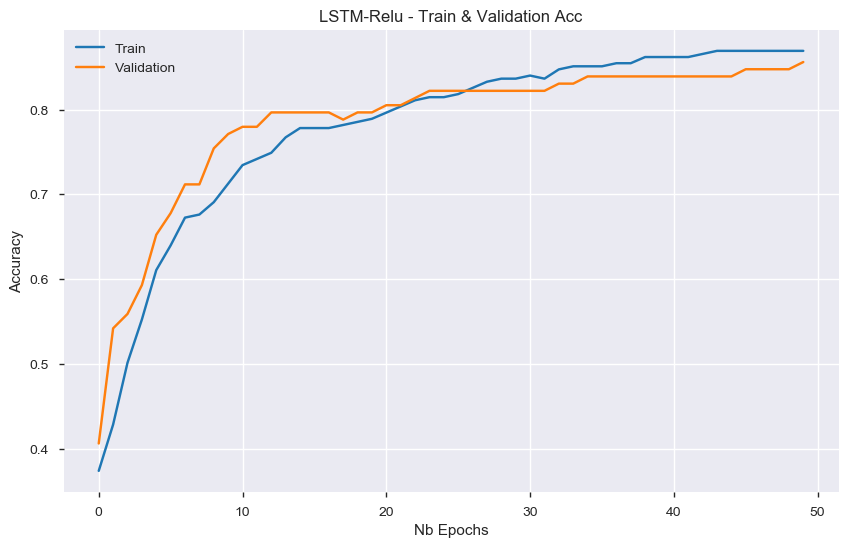

Maximum validation Acc of 85.59322044000788 reached at epoch 49


In [292]:
plot_acc(history11, 'LSTM-Relu - Train & Validation Acc')

In [305]:
# design network
model = Sequential()
model.add(LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(18, activation='tanh'))
model.add(Dense(5, activation='softmax'))

earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=10
                             , verbose=0)
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], optimizer='adamax')

In [306]:
# fit network
history12 = model.fit(train_X, y_train, epochs=5000, batch_size=30, validation_data=(test_X, y_test), verbose=2, shuffle=False,callbacks=[earlystopper])

Train on 275 samples, validate on 118 samples
Epoch 1/5000
 - 3s - loss: 1.5663 - acc: 0.4582 - val_loss: 1.5054 - val_acc: 0.5339
Epoch 2/5000
 - 0s - loss: 1.4795 - acc: 0.5164 - val_loss: 1.4196 - val_acc: 0.5254
Epoch 3/5000
 - 0s - loss: 1.4002 - acc: 0.5018 - val_loss: 1.3404 - val_acc: 0.4915
Epoch 4/5000
 - 0s - loss: 1.3297 - acc: 0.4691 - val_loss: 1.2761 - val_acc: 0.4576
Epoch 5/5000
 - 0s - loss: 1.2753 - acc: 0.4618 - val_loss: 1.2315 - val_acc: 0.4322
Epoch 6/5000
 - 0s - loss: 1.2384 - acc: 0.4509 - val_loss: 1.2028 - val_acc: 0.4237
Epoch 7/5000
 - 0s - loss: 1.2140 - acc: 0.4509 - val_loss: 1.1825 - val_acc: 0.4407
Epoch 8/5000
 - 0s - loss: 1.1958 - acc: 0.4655 - val_loss: 1.1649 - val_acc: 0.4576
Epoch 9/5000
 - 0s - loss: 1.1795 - acc: 0.4727 - val_loss: 1.1470 - val_acc: 0.4831
Epoch 10/5000
 - 0s - loss: 1.1630 - acc: 0.4836 - val_loss: 1.1278 - val_acc: 0.5000
Epoch 11/5000
 - 0s - loss: 1.1453 - acc: 0.5127 - val_loss: 1.1073 - val_acc: 0.5169
Epoch 12/5000
 - 

Epoch 96/5000
 - 0s - loss: 0.4701 - acc: 0.8764 - val_loss: 0.3920 - val_acc: 0.8644
Epoch 97/5000
 - 0s - loss: 0.4685 - acc: 0.8764 - val_loss: 0.3904 - val_acc: 0.8644
Epoch 98/5000
 - 0s - loss: 0.4669 - acc: 0.8764 - val_loss: 0.3888 - val_acc: 0.8644
Epoch 99/5000
 - 0s - loss: 0.4654 - acc: 0.8764 - val_loss: 0.3873 - val_acc: 0.8644
Epoch 100/5000
 - 0s - loss: 0.4639 - acc: 0.8764 - val_loss: 0.3857 - val_acc: 0.8729
Epoch 101/5000
 - 0s - loss: 0.4623 - acc: 0.8764 - val_loss: 0.3842 - val_acc: 0.8729
Epoch 102/5000
 - 0s - loss: 0.4608 - acc: 0.8764 - val_loss: 0.3827 - val_acc: 0.8729
Epoch 103/5000
 - 0s - loss: 0.4593 - acc: 0.8764 - val_loss: 0.3812 - val_acc: 0.8729
Epoch 104/5000
 - 0s - loss: 0.4579 - acc: 0.8764 - val_loss: 0.3798 - val_acc: 0.8729
Epoch 105/5000
 - 0s - loss: 0.4564 - acc: 0.8764 - val_loss: 0.3784 - val_acc: 0.8729
Epoch 106/5000
 - 0s - loss: 0.4550 - acc: 0.8764 - val_loss: 0.3769 - val_acc: 0.8729
Epoch 107/5000
 - 0s - loss: 0.4535 - acc: 0.88

Epoch 191/5000
 - 0s - loss: 0.3587 - acc: 0.9018 - val_loss: 0.3075 - val_acc: 0.8898
Epoch 192/5000
 - 0s - loss: 0.3577 - acc: 0.9018 - val_loss: 0.3071 - val_acc: 0.8898
Epoch 193/5000
 - 0s - loss: 0.3567 - acc: 0.9018 - val_loss: 0.3067 - val_acc: 0.8898
Epoch 194/5000
 - 0s - loss: 0.3557 - acc: 0.9018 - val_loss: 0.3064 - val_acc: 0.8898
Epoch 195/5000
 - 0s - loss: 0.3547 - acc: 0.9018 - val_loss: 0.3060 - val_acc: 0.8898
Epoch 196/5000
 - 0s - loss: 0.3537 - acc: 0.9018 - val_loss: 0.3057 - val_acc: 0.8898
Epoch 197/5000
 - 0s - loss: 0.3527 - acc: 0.9018 - val_loss: 0.3054 - val_acc: 0.8898
Epoch 198/5000
 - 0s - loss: 0.3518 - acc: 0.9018 - val_loss: 0.3051 - val_acc: 0.8898
Epoch 199/5000
 - 0s - loss: 0.3508 - acc: 0.9018 - val_loss: 0.3048 - val_acc: 0.8898
Epoch 200/5000
 - 0s - loss: 0.3498 - acc: 0.9018 - val_loss: 0.3045 - val_acc: 0.8898
Epoch 201/5000
 - 0s - loss: 0.3488 - acc: 0.9018 - val_loss: 0.3042 - val_acc: 0.8898
Epoch 202/5000
 - 0s - loss: 0.3479 - acc: 

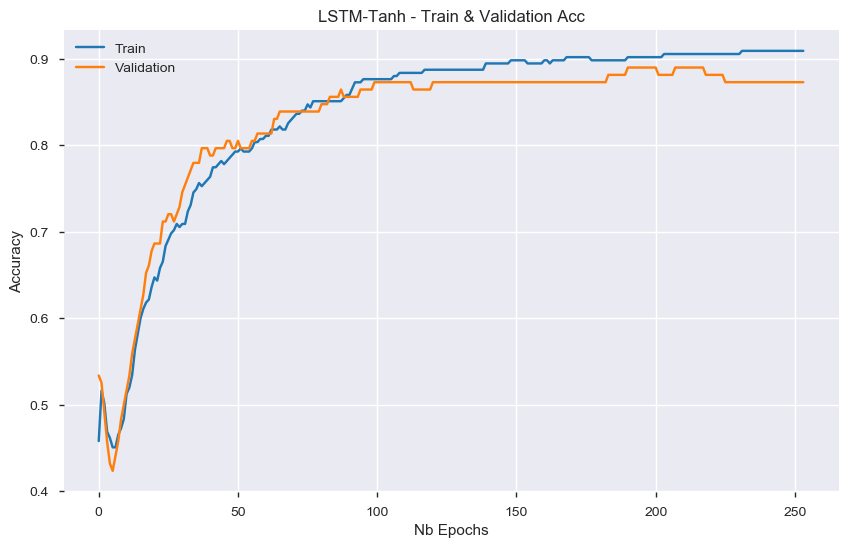

Maximum validation Acc of 88.98305034233351 reached at epoch 207


In [308]:
plot_acc(history12, 'LSTM-Tanh - Train & Validation Acc')

In [314]:
hist = pd.DataFrame(history12.history)
hist['epoch'] = history12.epoch
hist.tail()

,val_loss,val_acc,loss,acc,epoch
249,0.299435,0.872881,0.307199,0.909091,249
250,0.299445,0.872881,0.306475,0.909091,250
251,0.299460,0.872881,0.305758,0.909091,251
252,0.299478,0.872881,0.305049,0.909091,252
253,0.299499,0.872881,0.304347,0.909091,253


In [296]:
def plot_predicted(predicted_data, true_data):
    fig, ax = plt.subplots(figsize=(17,8))
    ax.set_title('Test Prediction vs. Actual after 100 epochs of training set')    
    ax.plot(true_data, label='True Data', color='green', linewidth='3')
    ax.plot(predicted_data, label='Prediction', color='red', linewidth='2')
    plt.legend()
    plt.show()

In [297]:
# evaluate the model
scores = model.evaluate(test_X, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 87.29%


In [298]:
# make a prediction
yhat = model.predict(test_X)

In [309]:

# design network
model = Sequential()
model.add(LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(18, activation='tanh'))
model.add(Dense(5, activation='softmax'))

earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=10
                             , verbose=0)
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], optimizer='adam')

In [310]:
# fit network
history13 = model.fit(train_X, y_train, epochs=5000, batch_size=30, validation_data=(test_X, y_test), verbose=2, shuffle=False,callbacks=[earlystopper])

Train on 275 samples, validate on 118 samples
Epoch 1/5000
 - 3s - loss: 1.5925 - acc: 0.4836 - val_loss: 1.5506 - val_acc: 0.4576
Epoch 2/5000
 - 0s - loss: 1.5303 - acc: 0.4473 - val_loss: 1.4863 - val_acc: 0.3983
Epoch 3/5000
 - 0s - loss: 1.4661 - acc: 0.4073 - val_loss: 1.4178 - val_acc: 0.3898
Epoch 4/5000
 - 0s - loss: 1.3985 - acc: 0.4000 - val_loss: 1.3486 - val_acc: 0.3898
Epoch 5/5000
 - 0s - loss: 1.3329 - acc: 0.4000 - val_loss: 1.2856 - val_acc: 0.3898
Epoch 6/5000
 - 0s - loss: 1.2758 - acc: 0.4036 - val_loss: 1.2335 - val_acc: 0.4153
Epoch 7/5000
 - 0s - loss: 1.2303 - acc: 0.4582 - val_loss: 1.1915 - val_acc: 0.4492
Epoch 8/5000
 - 0s - loss: 1.1943 - acc: 0.4800 - val_loss: 1.1556 - val_acc: 0.5000
Epoch 9/5000
 - 0s - loss: 1.1634 - acc: 0.5091 - val_loss: 1.1218 - val_acc: 0.5169
Epoch 10/5000
 - 0s - loss: 1.1336 - acc: 0.5382 - val_loss: 1.0874 - val_acc: 0.5339
Epoch 11/5000
 - 0s - loss: 1.1024 - acc: 0.5600 - val_loss: 1.0513 - val_acc: 0.5678
Epoch 12/5000
 - 

Epoch 96/5000
 - 0s - loss: 0.4625 - acc: 0.8836 - val_loss: 0.3854 - val_acc: 0.8729
Epoch 97/5000
 - 0s - loss: 0.4611 - acc: 0.8836 - val_loss: 0.3840 - val_acc: 0.8729
Epoch 98/5000
 - 0s - loss: 0.4596 - acc: 0.8836 - val_loss: 0.3826 - val_acc: 0.8729
Epoch 99/5000
 - 0s - loss: 0.4582 - acc: 0.8836 - val_loss: 0.3813 - val_acc: 0.8729
Epoch 100/5000
 - 0s - loss: 0.4568 - acc: 0.8836 - val_loss: 0.3799 - val_acc: 0.8729
Epoch 101/5000
 - 0s - loss: 0.4555 - acc: 0.8836 - val_loss: 0.3786 - val_acc: 0.8729
Epoch 102/5000
 - 0s - loss: 0.4541 - acc: 0.8836 - val_loss: 0.3774 - val_acc: 0.8729
Epoch 103/5000
 - 0s - loss: 0.4528 - acc: 0.8836 - val_loss: 0.3761 - val_acc: 0.8729
Epoch 104/5000
 - 0s - loss: 0.4515 - acc: 0.8836 - val_loss: 0.3748 - val_acc: 0.8729
Epoch 105/5000
 - 0s - loss: 0.4502 - acc: 0.8836 - val_loss: 0.3736 - val_acc: 0.8729
Epoch 106/5000
 - 0s - loss: 0.4489 - acc: 0.8873 - val_loss: 0.3724 - val_acc: 0.8729
Epoch 107/5000
 - 0s - loss: 0.4476 - acc: 0.88

Epoch 191/5000
 - 0s - loss: 0.3697 - acc: 0.9018 - val_loss: 0.3116 - val_acc: 0.8814
Epoch 192/5000
 - 0s - loss: 0.3689 - acc: 0.9018 - val_loss: 0.3112 - val_acc: 0.8814
Epoch 193/5000
 - 0s - loss: 0.3681 - acc: 0.9055 - val_loss: 0.3109 - val_acc: 0.8898
Epoch 194/5000
 - 0s - loss: 0.3673 - acc: 0.9055 - val_loss: 0.3105 - val_acc: 0.8898
Epoch 195/5000
 - 0s - loss: 0.3665 - acc: 0.9055 - val_loss: 0.3102 - val_acc: 0.8983
Epoch 196/5000
 - 0s - loss: 0.3657 - acc: 0.9055 - val_loss: 0.3098 - val_acc: 0.8983
Epoch 197/5000
 - 0s - loss: 0.3649 - acc: 0.9055 - val_loss: 0.3095 - val_acc: 0.8983
Epoch 198/5000
 - 0s - loss: 0.3641 - acc: 0.9055 - val_loss: 0.3092 - val_acc: 0.8983
Epoch 199/5000
 - 0s - loss: 0.3633 - acc: 0.9055 - val_loss: 0.3089 - val_acc: 0.8983
Epoch 200/5000
 - 0s - loss: 0.3625 - acc: 0.9055 - val_loss: 0.3086 - val_acc: 0.8983
Epoch 201/5000
 - 0s - loss: 0.3617 - acc: 0.9055 - val_loss: 0.3083 - val_acc: 0.8983
Epoch 202/5000
 - 0s - loss: 0.3609 - acc: 

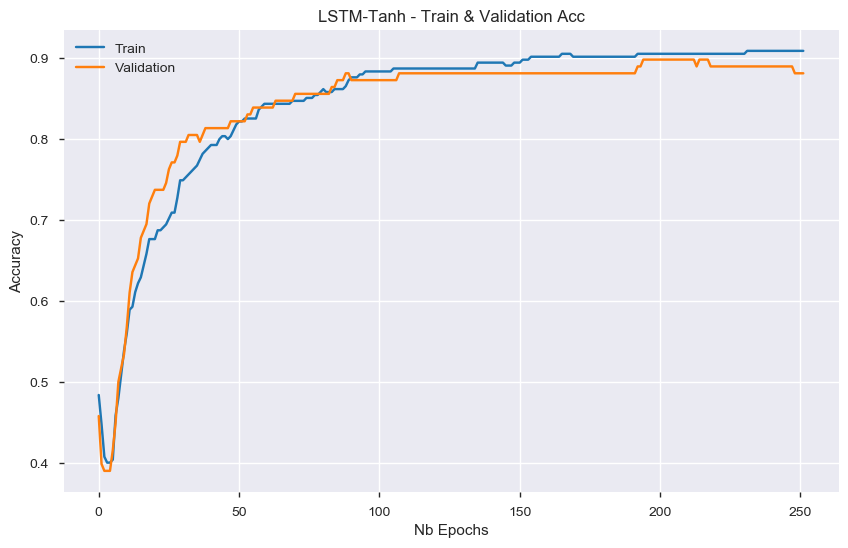

Maximum validation Acc of 89.83050867662593 reached at epoch 214


In [311]:
plot_acc(history13, 'LSTM-Tanh - Train & Validation Acc')

In [312]:
# evaluate the model
scores = model.evaluate(test_X, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 88.14%


In [313]:
hist = pd.DataFrame(history13.history)
hist['epoch'] = history13.epoch
hist.tail()

,val_loss,val_acc,loss,acc,epoch
247,0.303008,0.889831,0.326326,0.909091,247
248,0.303040,0.881356,0.325623,0.909091,248
249,0.303074,0.881356,0.324920,0.909091,249
250,0.303111,0.881356,0.324218,0.909091,250
251,0.303151,0.881356,0.323518,0.909091,251


In [321]:
test_predictions = model.predict(test_X)

In [329]:
test_predictions=np.argmax(test_predictions,axis=1)


In [332]:
test_predictions

array([2, 1, 2, 1, 3, 2, 1, 2, 2, 1, 1, 1, 1, 3, 3, 3, 4, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 4, 3, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 3,
       2, 1, 1, 3, 1, 1, 1, 2, 2, 3, 1, 3, 1, 2, 1, 1, 2, 3, 1, 3, 2, 1,
       2, 1, 2, 2, 2, 3, 1, 3, 2, 2, 3, 2, 2, 1, 3, 3, 2, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 2, 1, 1, 3,
       1, 3, 2, 1, 2, 3, 2, 2], dtype=int64)

In [333]:
y_test

array([2, 1, 2, 1, 3, 3, 1, 2, 1, 1, 1, 1, 1, 3, 3, 2, 4, 1, 1, 1, 2, 2,
       3, 2, 2, 2, 1, 2, 1, 3, 1, 4, 3, 2, 3, 2, 1, 2, 2, 1, 1, 2, 1, 3,
       2, 1, 1, 3, 1, 1, 1, 2, 2, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       2, 1, 2, 2, 3, 3, 1, 3, 2, 2, 3, 3, 2, 0, 3, 2, 2, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 2, 1, 1, 3,
       1, 3, 2, 1, 2, 3, 2, 2], dtype=int64)

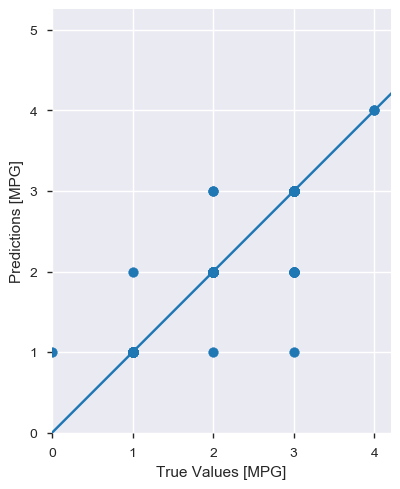

In [331]:
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [336]:
def plot_predicted(predicted_data, true_data):
    fig, ax = plt.subplots(figsize=(17,8))
    ax.set_title('Test Prediction vs. Actual after 100 epochs of training set')    
    ax.plot(true_data, label='True Data', color='blue', linewidth='3')
    ax.plot(predicted_data, label='Prediction', color='orange', linewidth='2')
    plt.legend()
    plt.show()


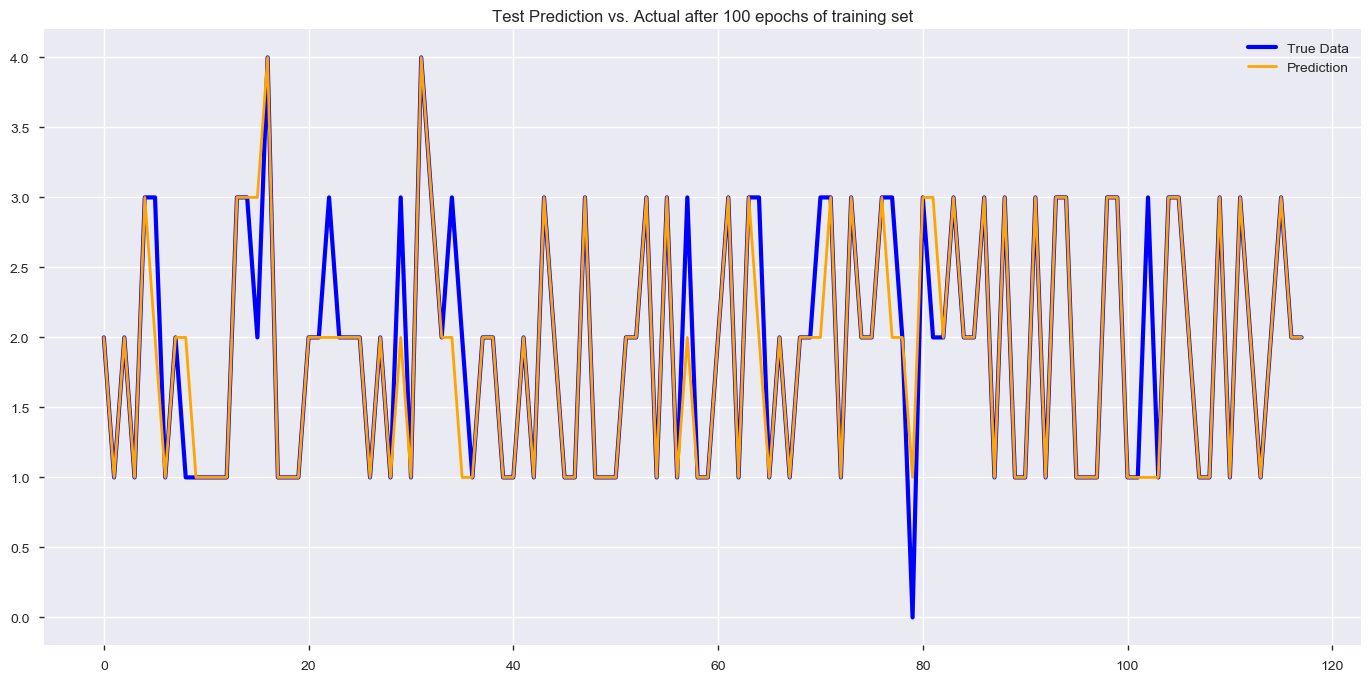

In [338]:
plot_predicted(test_predictions[:118,], y_test[:118,])